<a href="https://colab.research.google.com/github/dewisnu/laporan-dicoding/blob/master/Predictive%20Analytics/Predectivie_Analysy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare Datasets
I Gede Ari Wisnu Sanjaya

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!touch ~/.kaggle/kaggle.json

In [7]:
api_token = {"username":"dewisnus","key":"248d855b392dedd2cdf8b0e64e83cfaa"}

In [6]:
import json

In [8]:
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [9]:
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!mkdir datasets

In [10]:
!kaggle datasets download axeltorbenson/unemployment-data-19482021

  0% 0.00/13.5k [00:00<?, ?B/s]
100% 13.5k/13.5k [00:00<00:00, 3.42MB/s]


In [12]:
!unzip /content/unemployment-data-19482021.zip -d datasets/

Archive:  /content/unemployment-data-19482021.zip
  inflating: datasets/unemployment_rate_data.csv  


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [14]:
df = pd.read_csv('/content/datasets/unemployment_rate_data.csv')
df

date  unrate  unrate_men  unrate_women  unrate_16_to_17  \
0     1/1/1948     4.0         4.2           3.5             10.8   
1     2/1/1948     4.7         4.7           4.8             15.0   
2     3/1/1948     4.5         4.5           4.4             13.2   
3     4/1/1948     4.0         4.0           4.1              9.9   
4     5/1/1948     3.4         3.3           3.4              6.4   
..         ...     ...         ...           ...              ...   
882   7/1/2021     5.7         5.5           5.8             12.8   
883   8/1/2021     5.3         5.1           5.5             10.7   
884   9/1/2021     4.6         4.6           4.5              9.2   
885  10/1/2021     4.3         4.2           4.4              8.6   
886  11/1/2021     3.9         3.9           3.9              9.7   

     unrate_18_to_19  unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  \
0                9.6              6.6              3.6              2.6   
1                9.5              8.0              4.0              3.2   
2                9.3              8.6              3.5              3.2   
3                8.1              6.8              3.5              3.1   
4                7.2              6.3              2.8              2.5   
..               ...              ...              ...              ...   
882              9.9              9.5              6.3              4.8   
883             11.0              9.1              5.8              4.4   
884             12.6              7.7              5.0              3.8   
885             12.7              6.8              4.5              3.6   
886             11.0              6.6              3.8              3.6   

     unrate_45_to_54  unrate_55_over  
0                2.7             3.6  
1                3.4             4.0  
2                2.9             3.5  
3                2.9             3.2  
4                2.3             2.9  
..               ...             ...  
882              4.0             4.6  
883              4.2             4.1  
884              3.7             3.3  
885              3.5             3.3  
886              2.8             3.1  

[887 rows x 11 columns]

#Data Uderstanding

*  Memberikan informasi jumlah data, kondisi data , dan informasi mengenai data yang digunakan

* Menuliskan tautan sumber data (link download)
https://www.kaggle.com/datasets/axeltorbenson/unemployment-data-19482021

* Menguraikan seluruh variabel atau fitur pada data.
* Melakukan beberapa tahapan yang diperlukan untuk memahami data contohnya teknik visualisasi data atau exploratory data analysis.




<br>

### infomasi mengenai kolom:

* unrate: total jumlah pengganguran keseluruhan
* unrate_men: total jumlah pengganguran pria
* unrate_women: total jumlah pengganguran wanita
* unrate_16_to_17: total jumlah penggaguran umur 16
  sampai 17 tahun
* unrate_18_to_19: total jumlah penggaguran umur 18 sampai 19 tahun
* unrate_20_to_24: total jumlah pengganguran umur 20 sampai 24 tahun
* unrate_25_to_34: total jumlah pengganguran umur 25 sampai 34 tahun
* unrate_35_to_44: total jumlah pengganguran umur 35 sampai 44 tahun
* unrate_45_to_54:total jumlah pengganguran umur 45 sampai 54 tahun
* unrate_55_over: total jumlah penganguran umur 55 dan diatas umur 55

<br>

###Note
unrate adalah jumlah pengganguran keseluruhan yang akan kita prediksi , sisanya adalah tipe penganguran nya . Data ini sudah clean dan tidak ada null , total data/raw kisaran 887 (sudah melebihi minimum data yang di sarankan)


In [16]:
df.shape

(887, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             887 non-null    object 
 1   unrate           887 non-null    float64
 2   unrate_men       887 non-null    float64
 3   unrate_women     887 non-null    float64
 4   unrate_16_to_17  887 non-null    float64
 5   unrate_18_to_19  887 non-null    float64
 6   unrate_20_to_24  887 non-null    float64
 7   unrate_25_to_34  887 non-null    float64
 8   unrate_35_to_44  887 non-null    float64
 9   unrate_45_to_54  887 non-null    float64
 10  unrate_55_over   887 non-null    float64
dtypes: float64(10), object(1)
memory usage: 76.4+ KB


In [18]:
df.describe()

unrate  unrate_men  unrate_women  unrate_16_to_17  unrate_18_to_19  \
count  887.000000  887.000000    887.000000       887.000000       887.000000   
mean     5.763134    5.633709      6.028749        17.943517        14.824803   
std      1.740101    1.954639      1.608252         5.018894         4.047867   
min      2.400000    1.900000      2.600000         5.700000         5.200000   
25%      4.500000    4.300000      4.900000        14.700000        12.300000   
50%      5.500000    5.300000      5.800000        17.800000        14.600000   
75%      6.800000    6.700000      7.000000        20.900000        17.000000   
max     14.400000   13.300000     15.700000        35.800000        33.300000   

       unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  unrate_45_to_54  \
count       887.000000       887.000000       887.000000       887.000000   
mean          9.345660         5.532582         4.242954         3.867193   
std           2.800988         1.923600         1.443626         1.352247   
min           3.300000         2.000000         1.600000         1.500000   
25%           7.700000         4.200000         3.200000         2.950000   
50%           9.100000         5.200000         4.000000         3.600000   
75%          10.800000         6.700000         5.000000         4.500000   
max          25.000000        14.300000        11.300000        12.100000   

       unrate_55_over  
count      887.000000  
mean         3.838782  
std          1.241579  
min          1.500000  
25%          3.000000  
50%          3.600000  
75%          4.400000  
max         13.400000

#EDA

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             887 non-null    datetime64[ns]
 1   unrate           887 non-null    float64       
 2   unrate_men       887 non-null    float64       
 3   unrate_women     887 non-null    float64       
 4   unrate_16_to_17  887 non-null    float64       
 5   unrate_18_to_19  887 non-null    float64       
 6   unrate_20_to_24  887 non-null    float64       
 7   unrate_25_to_34  887 non-null    float64       
 8   unrate_35_to_44  887 non-null    float64       
 9   unrate_45_to_54  887 non-null    float64       
 10  unrate_55_over   887 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 76.4 KB


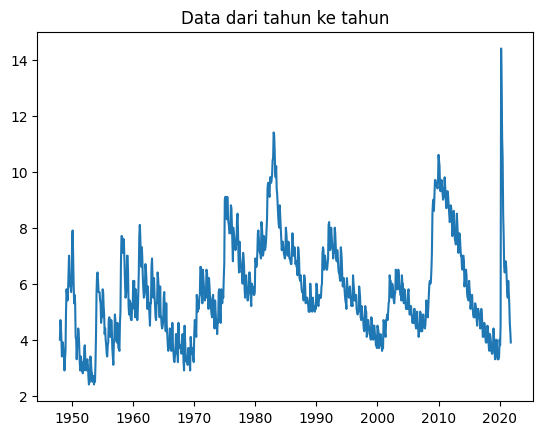

In [21]:
plt.title(f'Data dari tahun ke tahun')
plt.plot(df['date'], df['unrate'])
plt.show()

In [22]:
year = df['date'].dt.year
year

0      1948
1      1948
2      1948
3      1948
4      1948
       ... 
882    2021
883    2021
884    2021
885    2021
886    2021
Name: date, Length: 887, dtype: int64

In [23]:
year.unique()

array([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

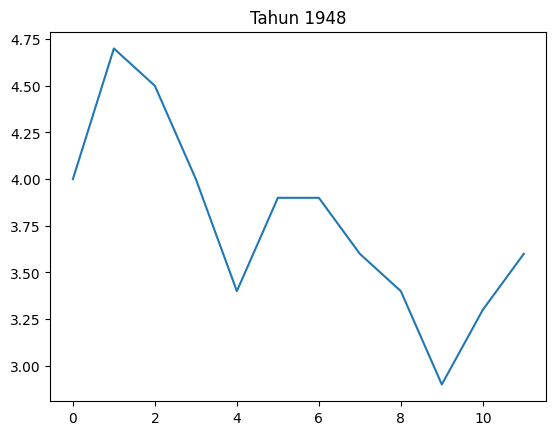

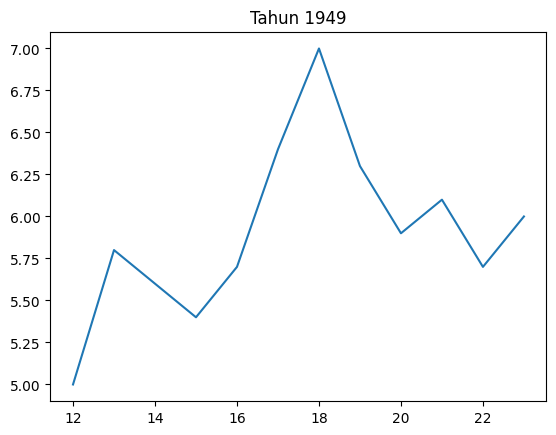

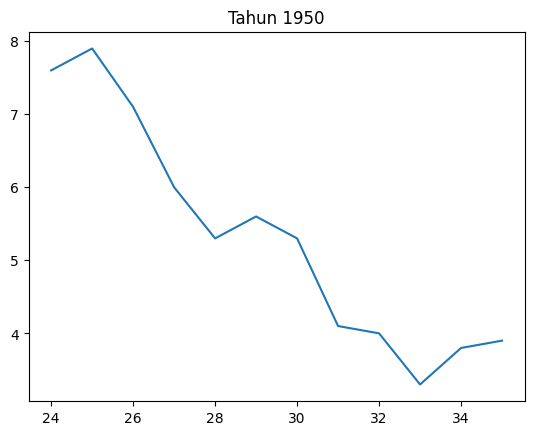

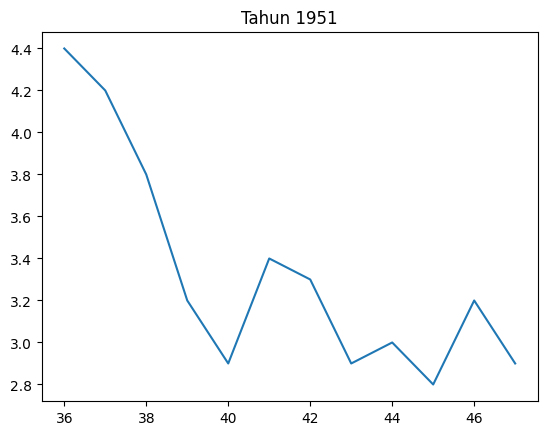

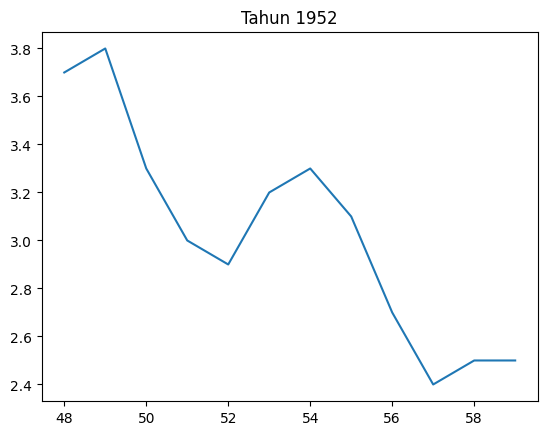

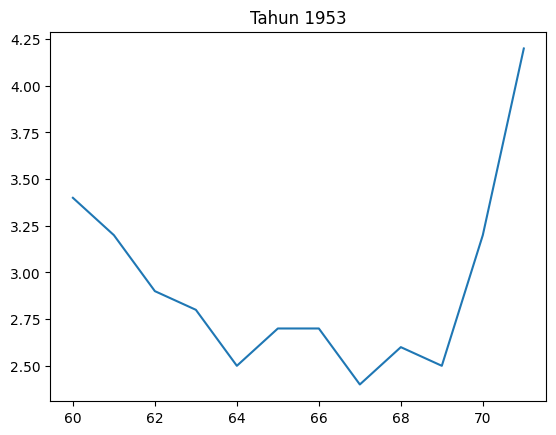

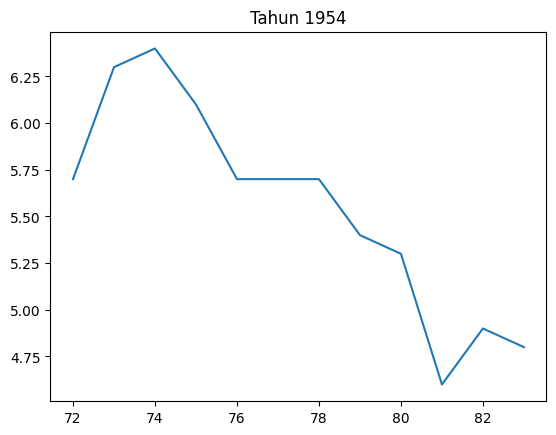

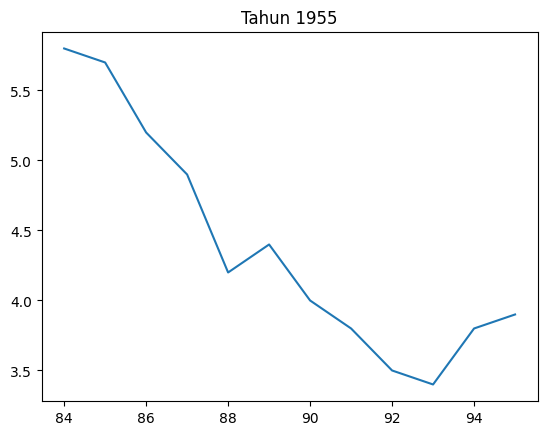

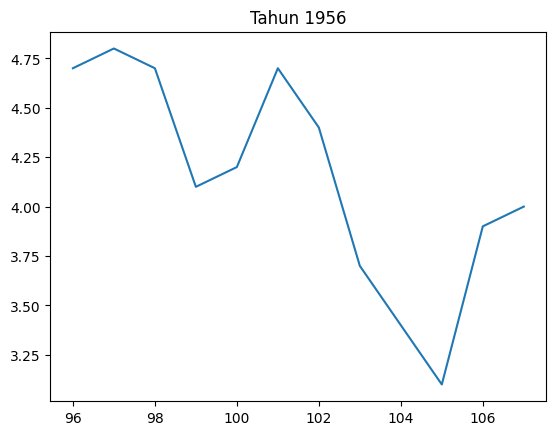

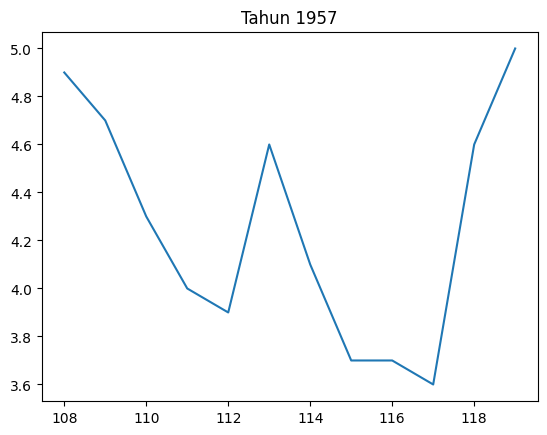

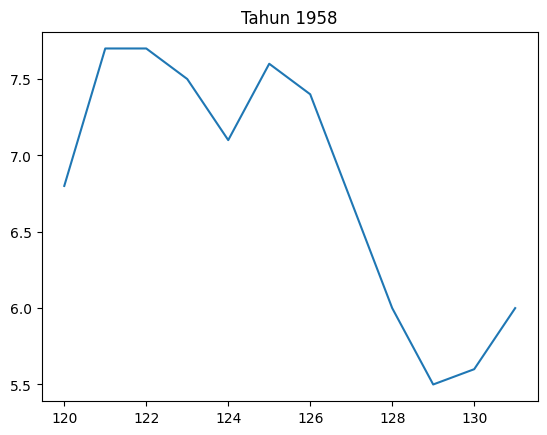

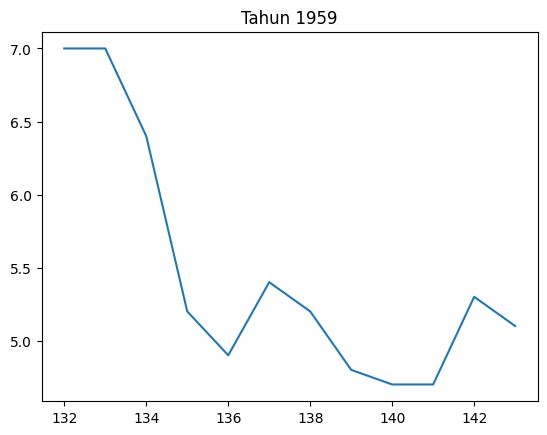

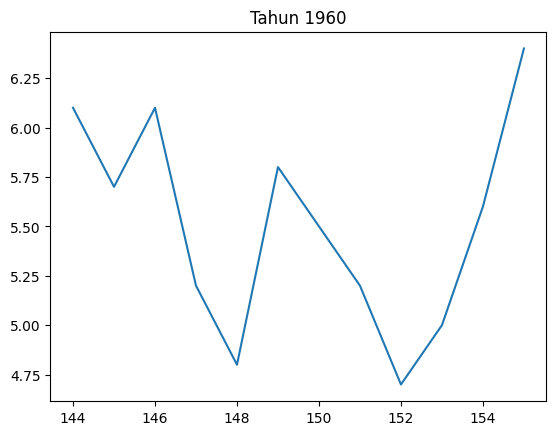

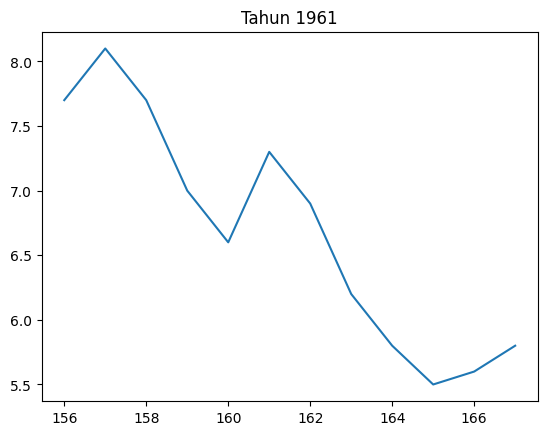

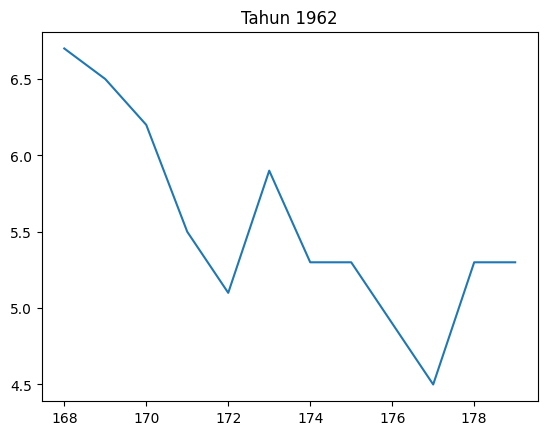

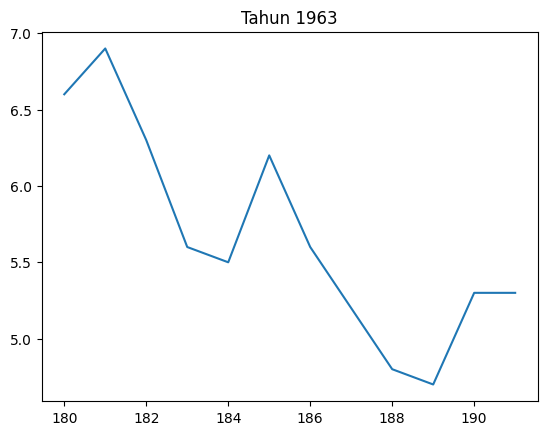

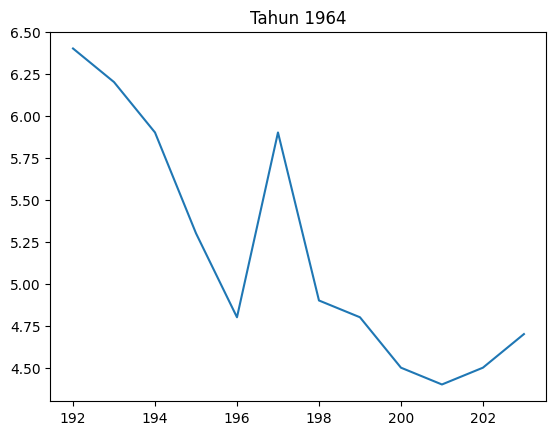

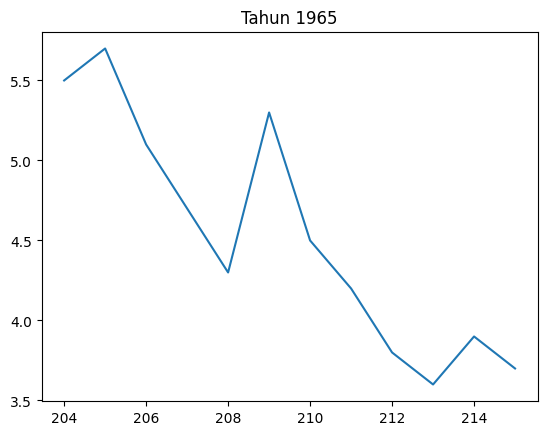

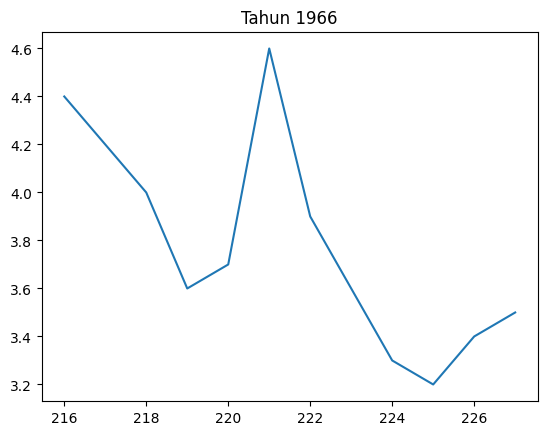

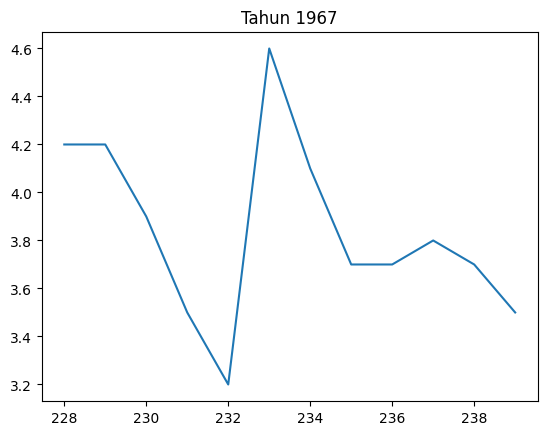

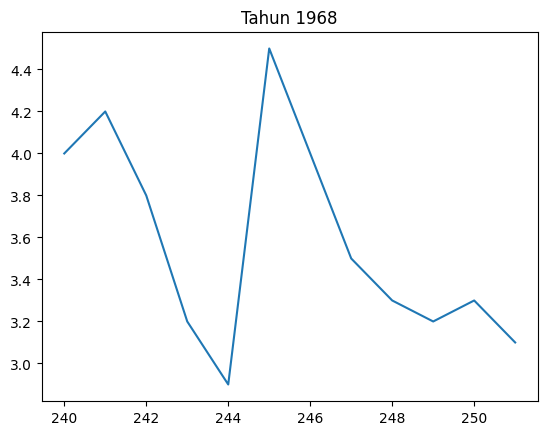

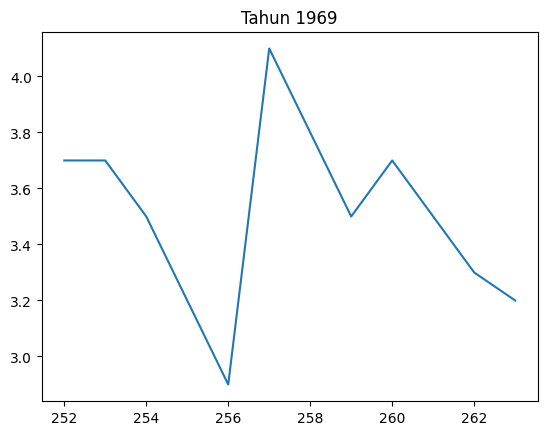

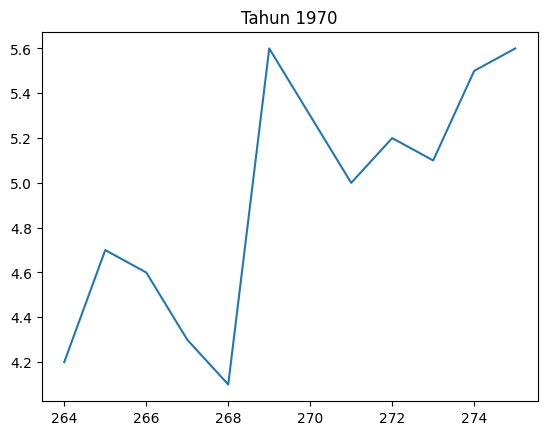

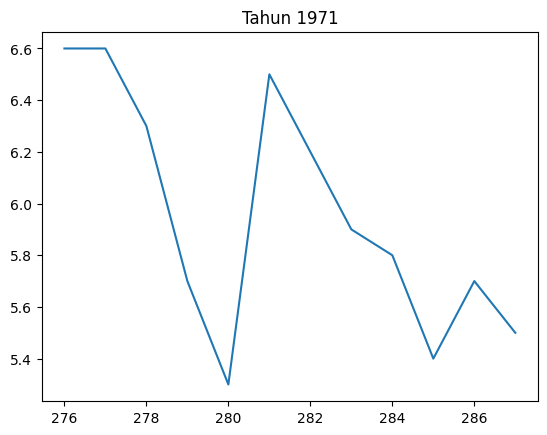

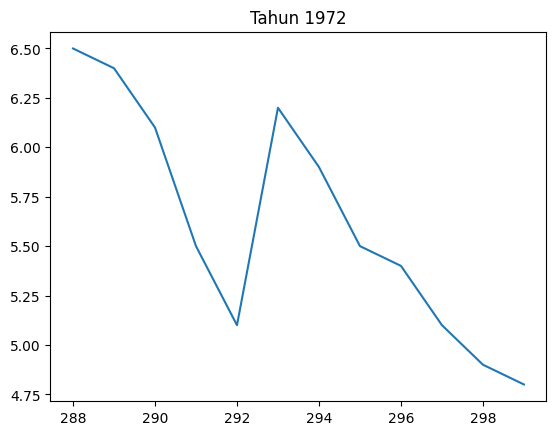

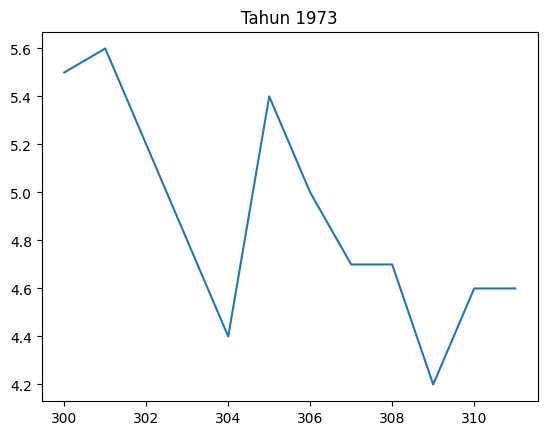

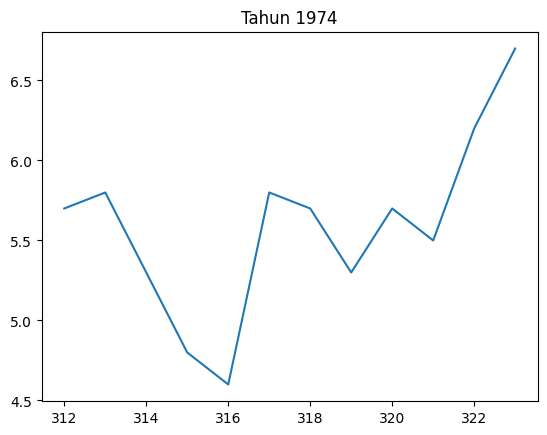

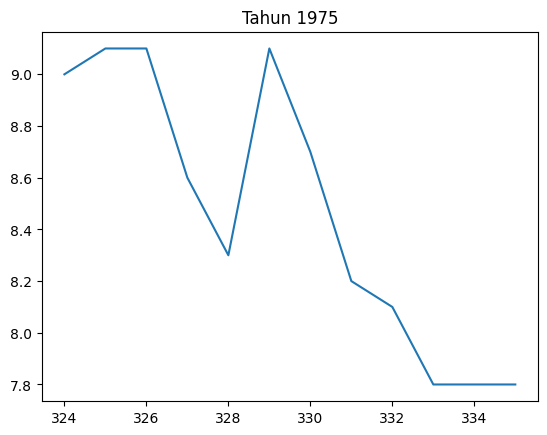

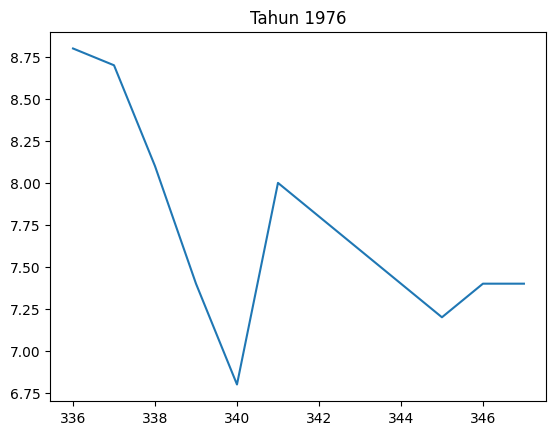

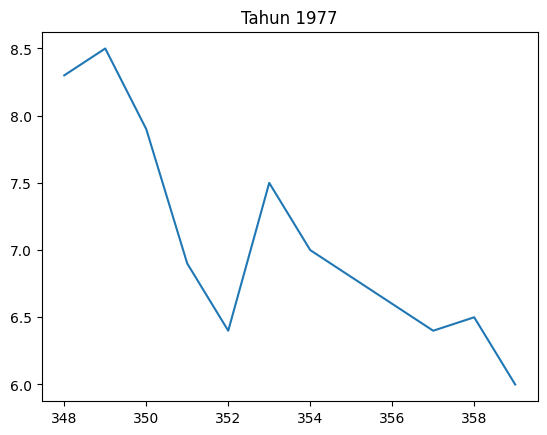

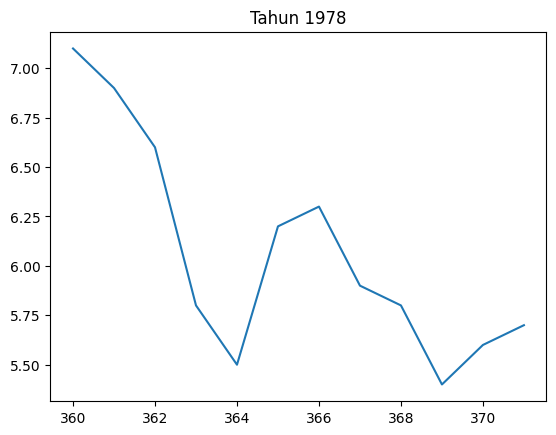

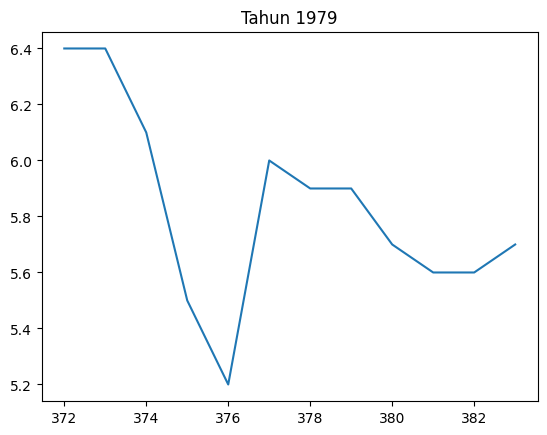

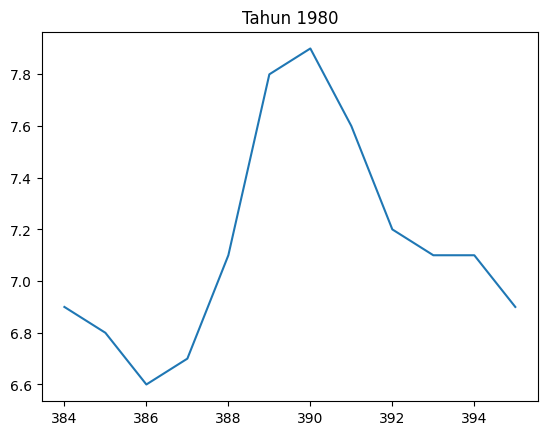

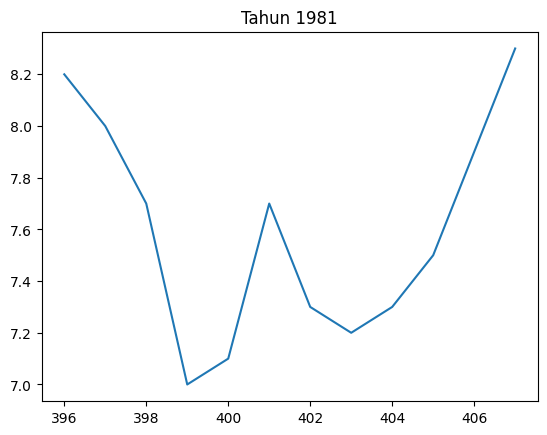

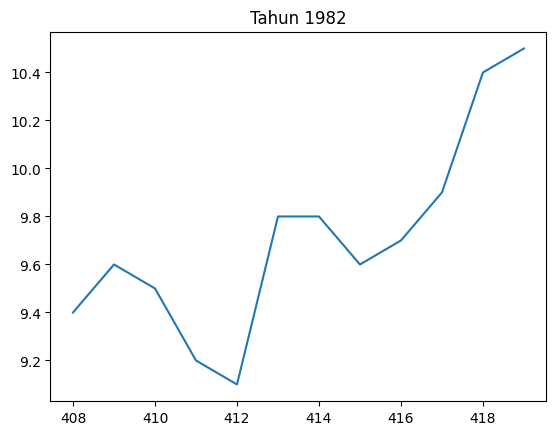

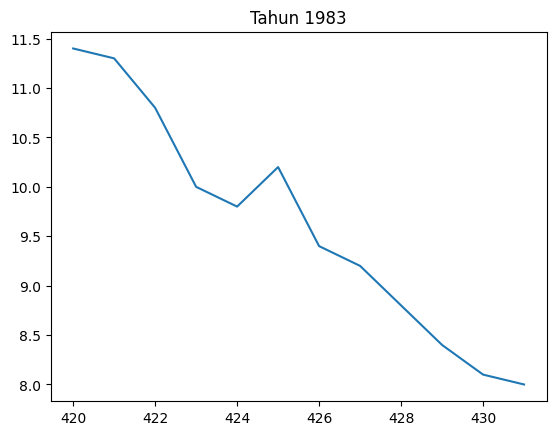

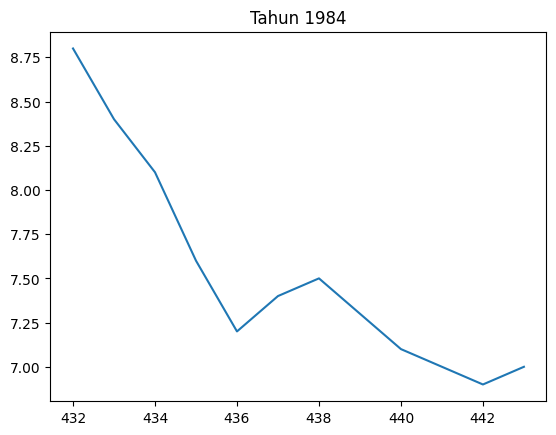

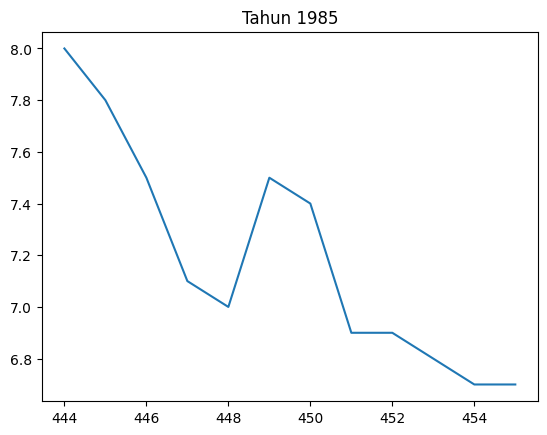

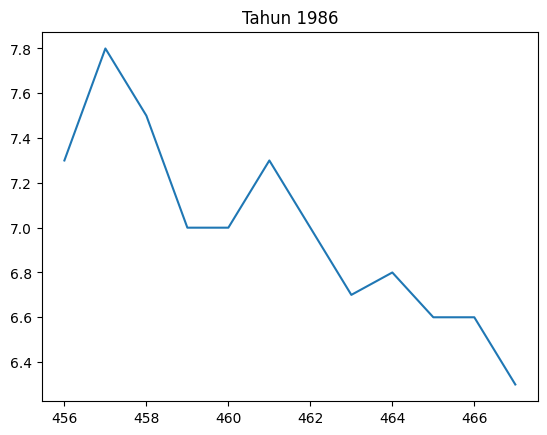

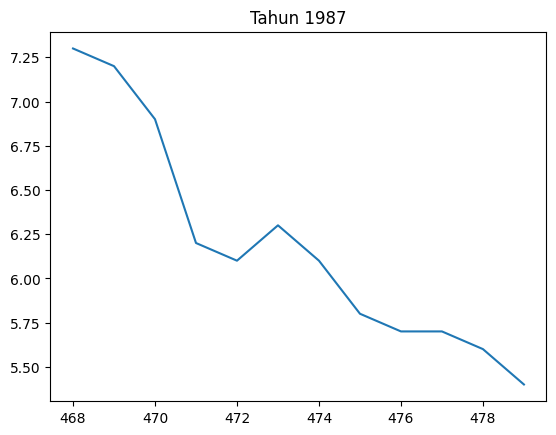

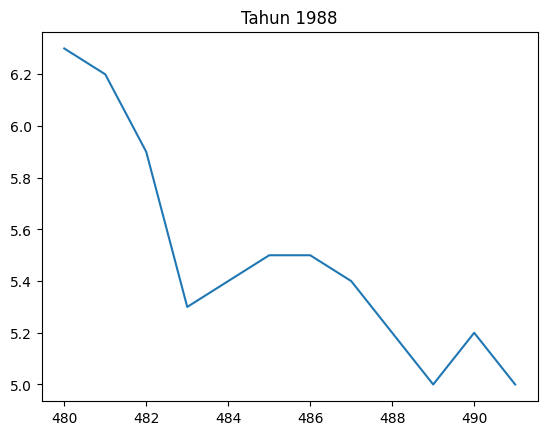

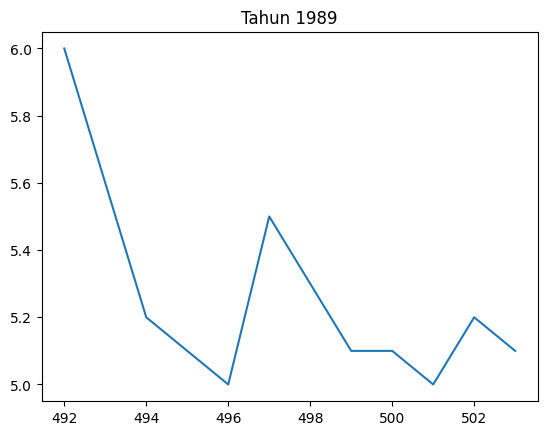

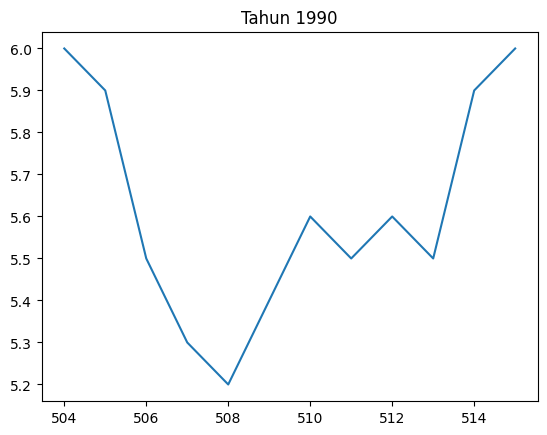

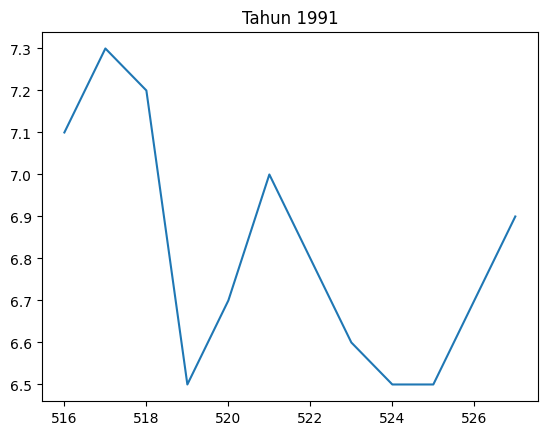

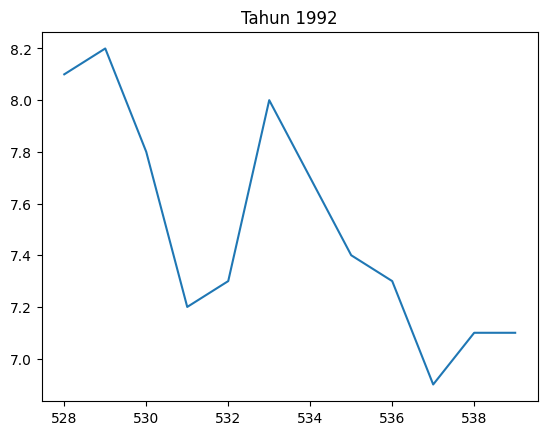

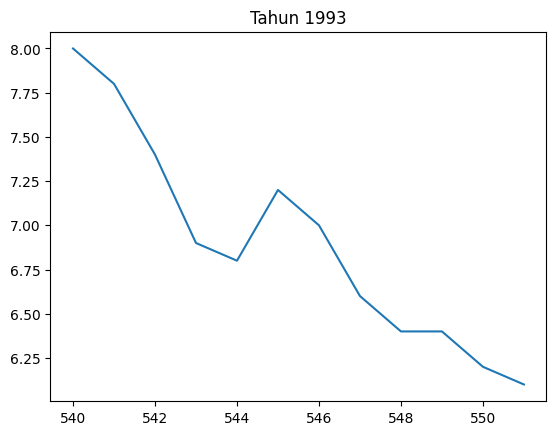

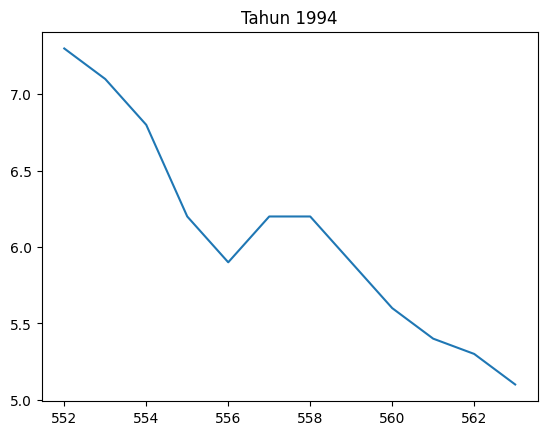

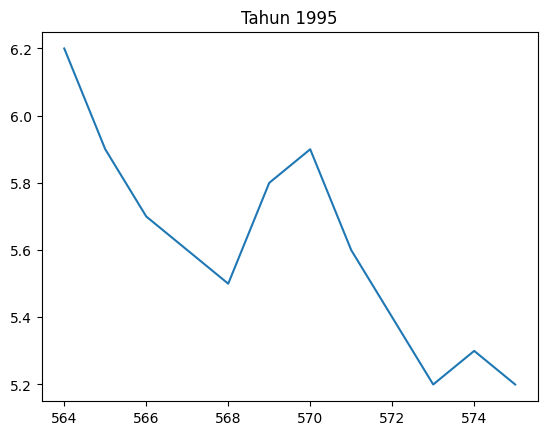

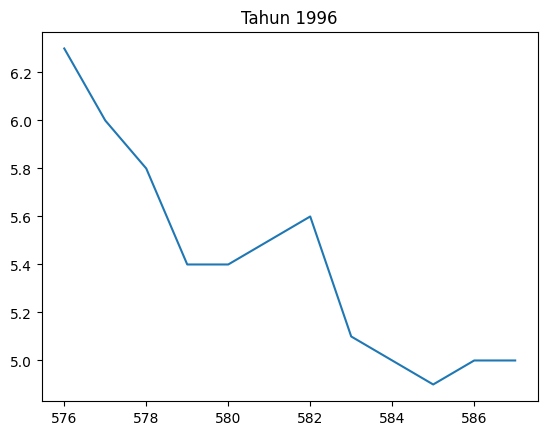

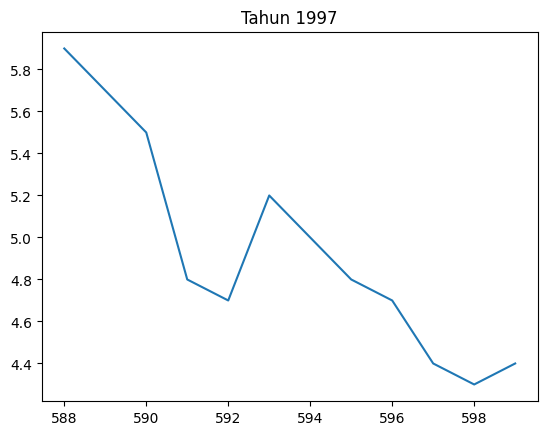

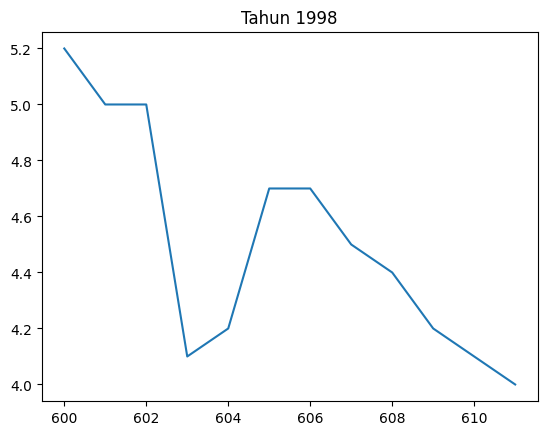

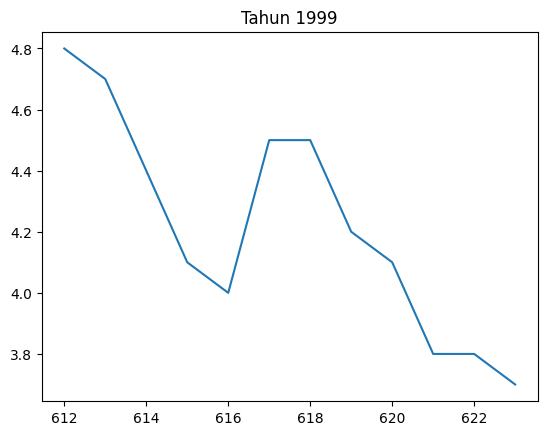

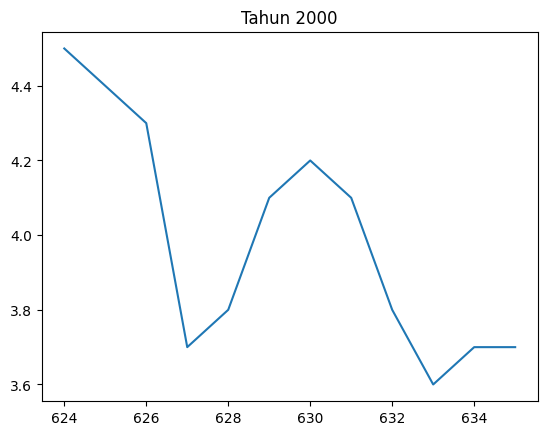

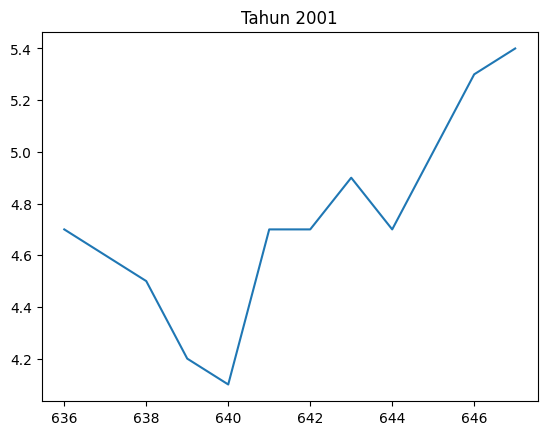

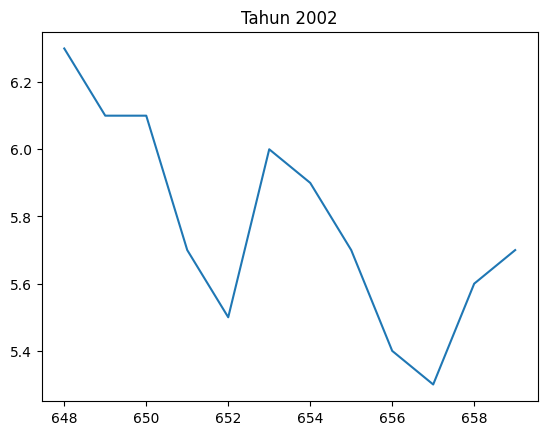

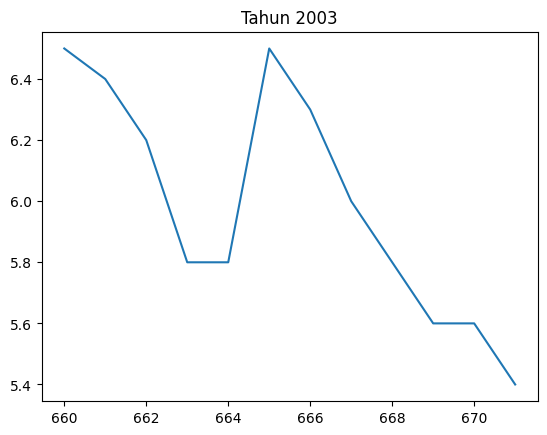

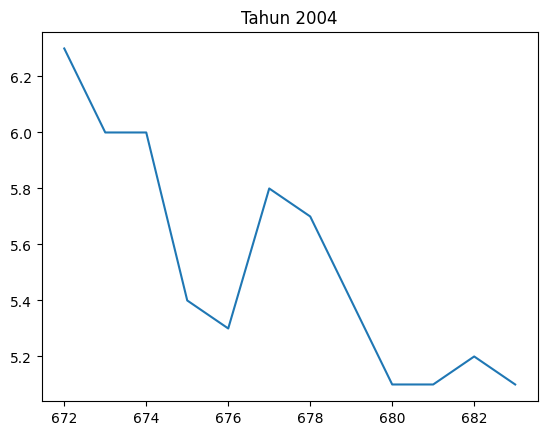

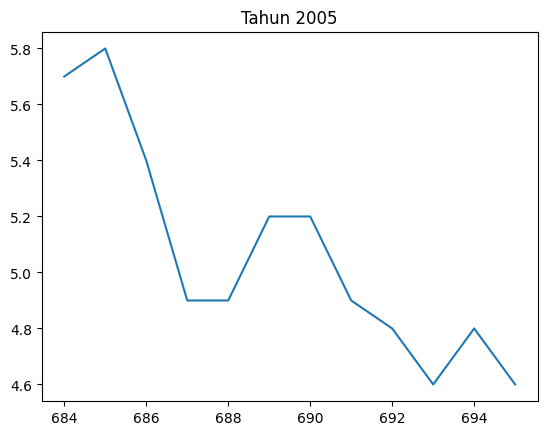

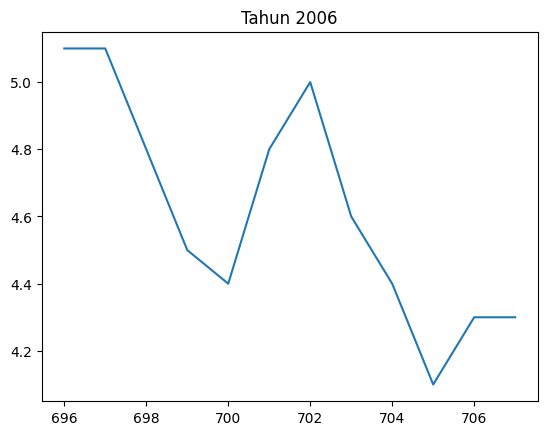

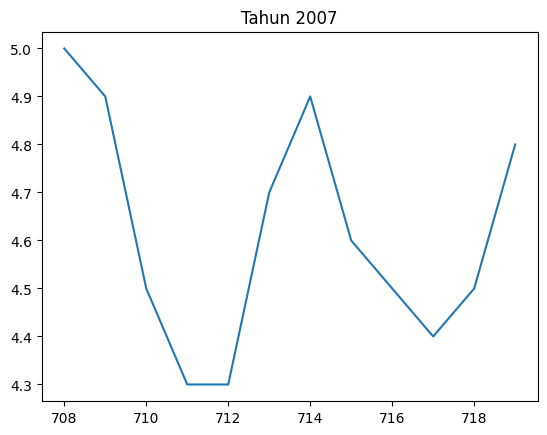

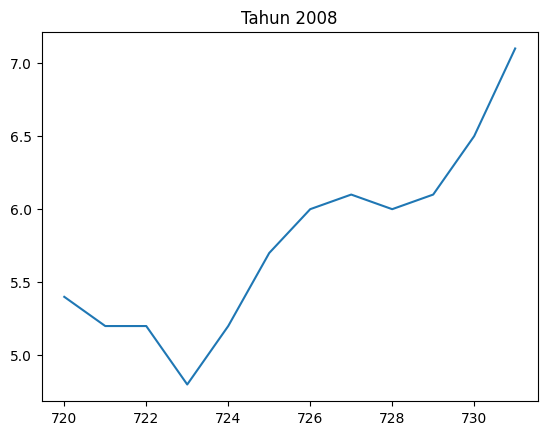

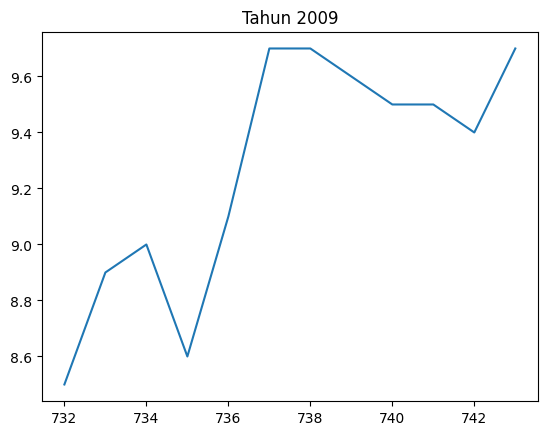

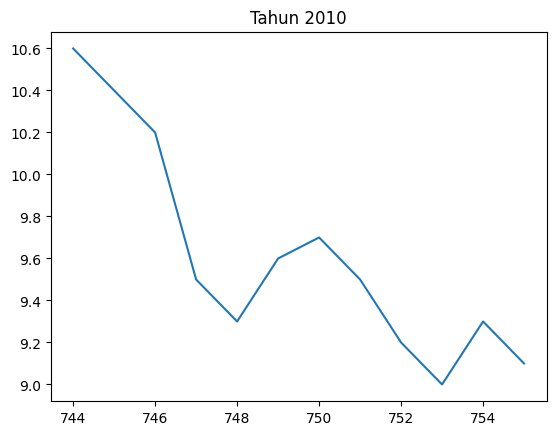

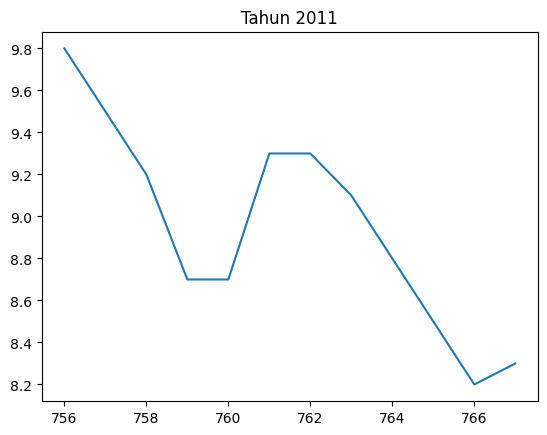

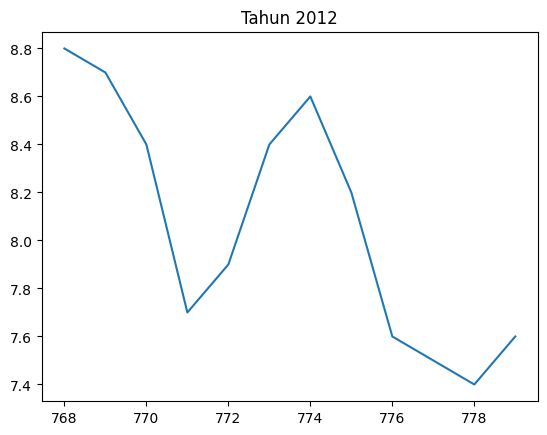

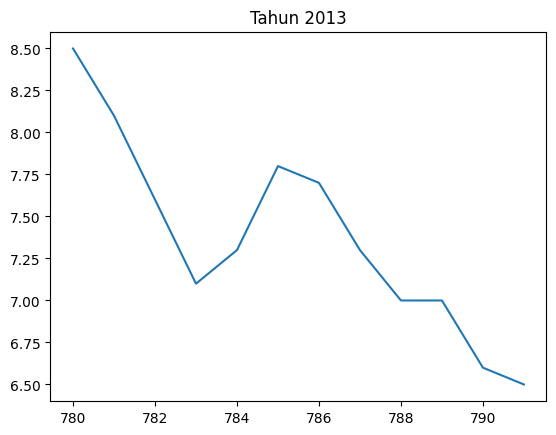

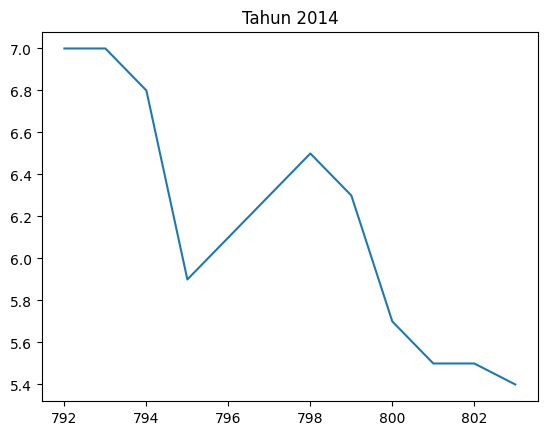

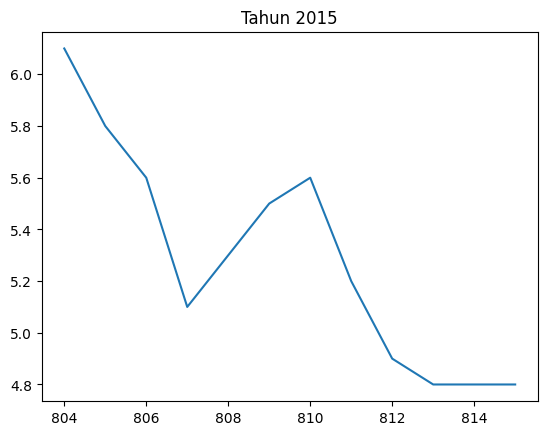

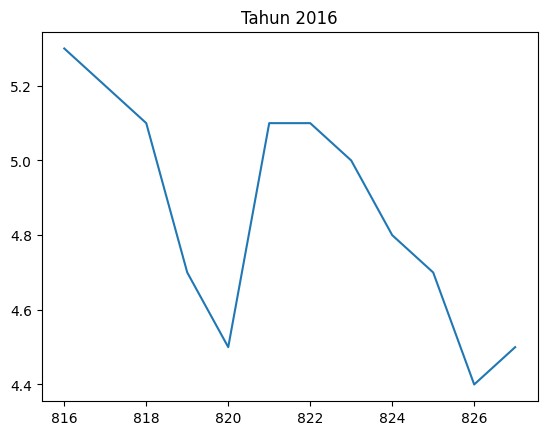

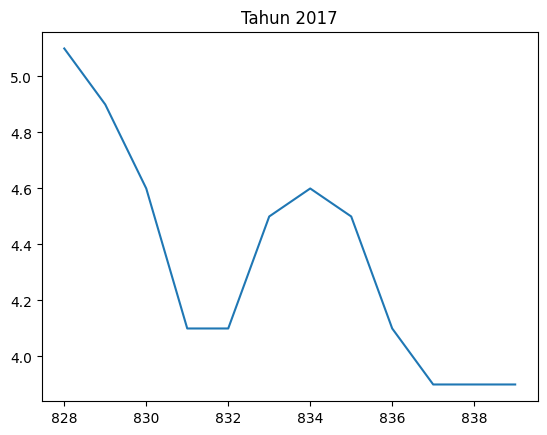

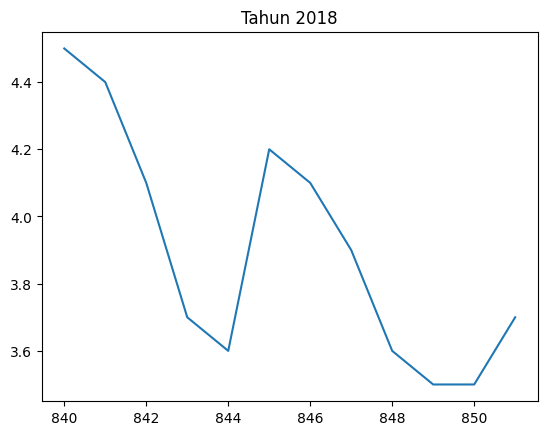

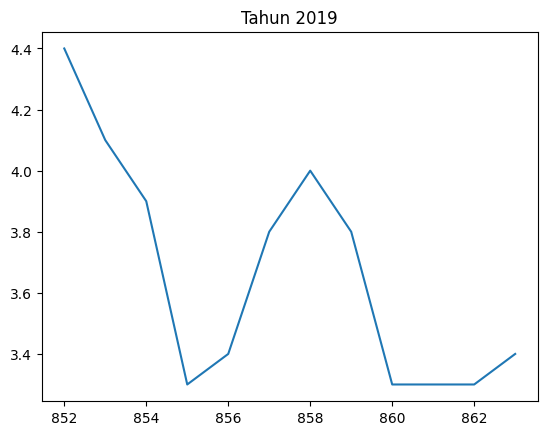

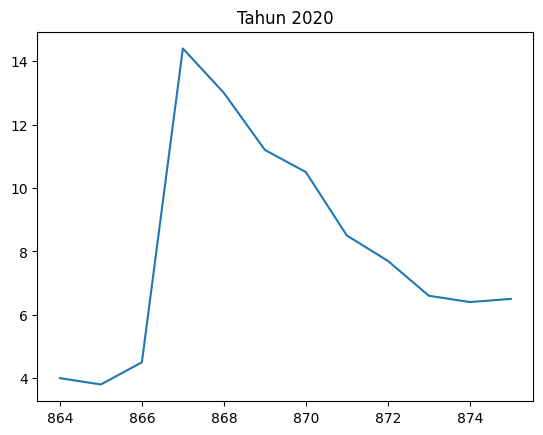

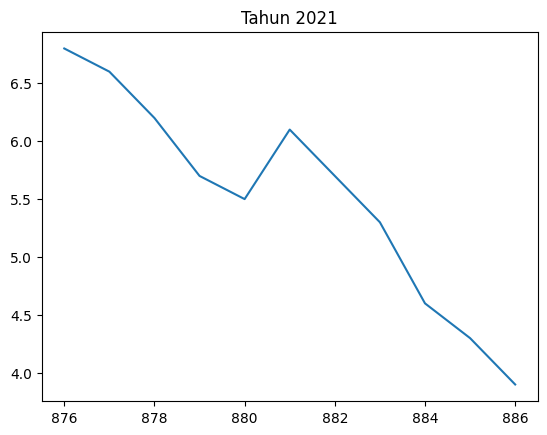

In [24]:

for y in year.unique():
  plt.title(f'Tahun {y}')
  plt.plot(df[df['date'].dt.year == y].unrate)
  plt.show()

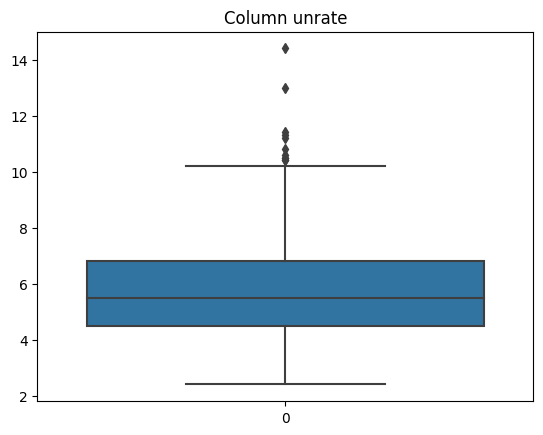

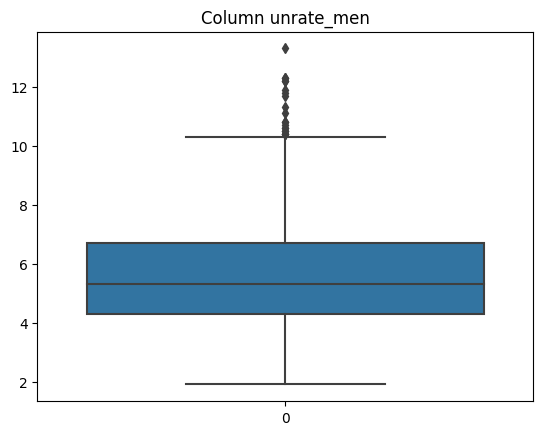

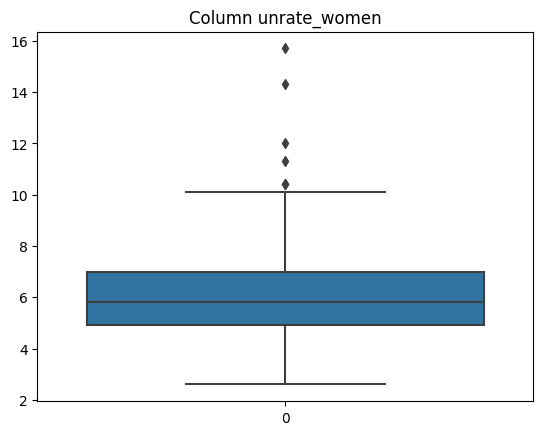

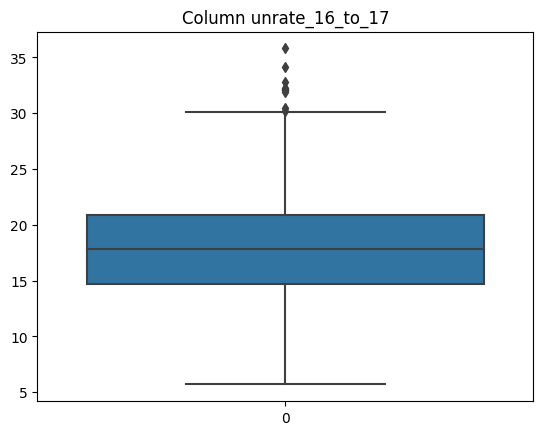

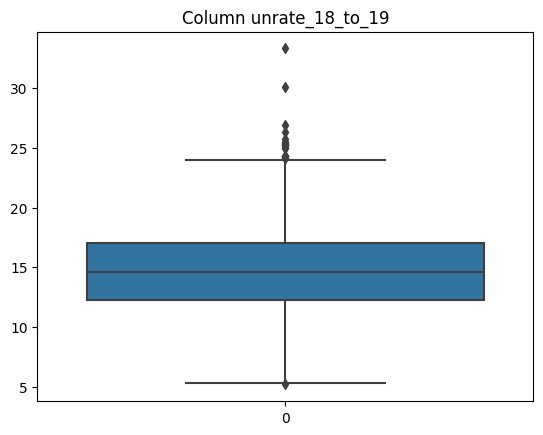

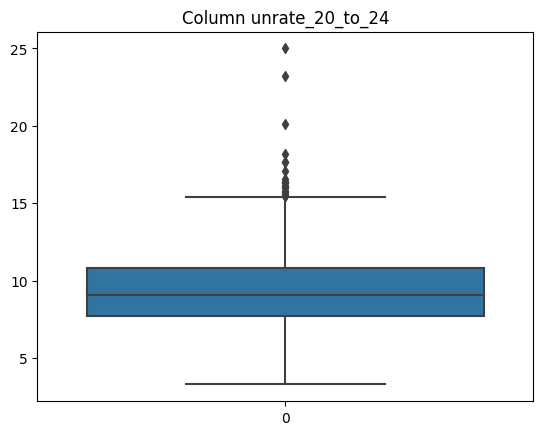

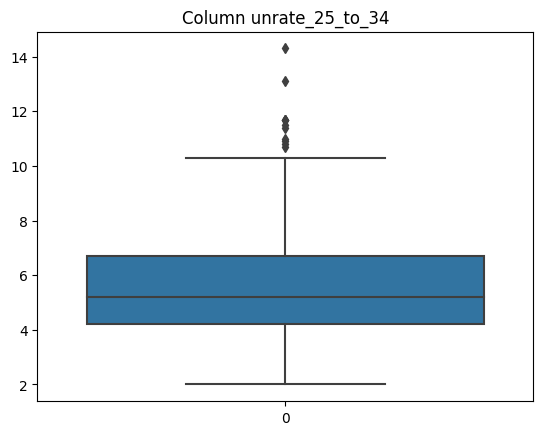

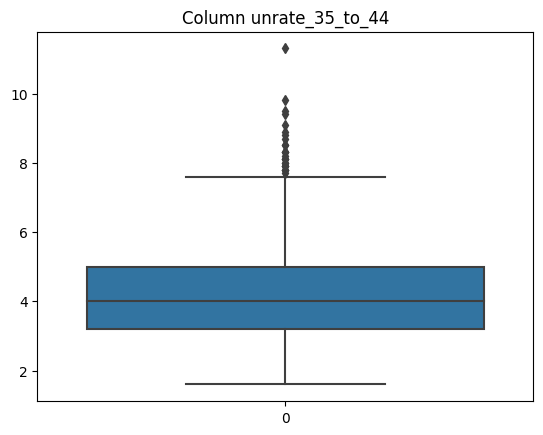

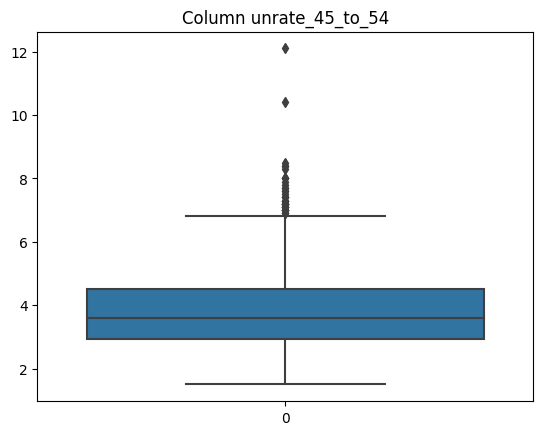

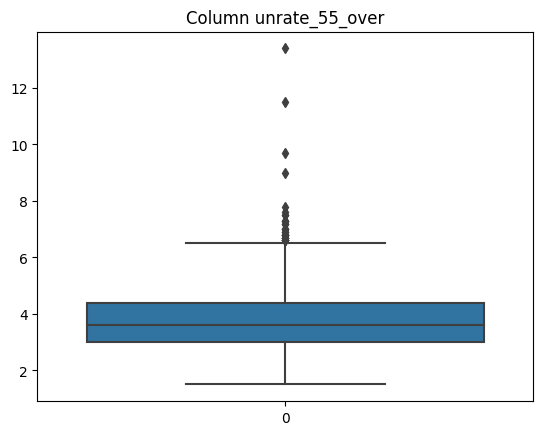

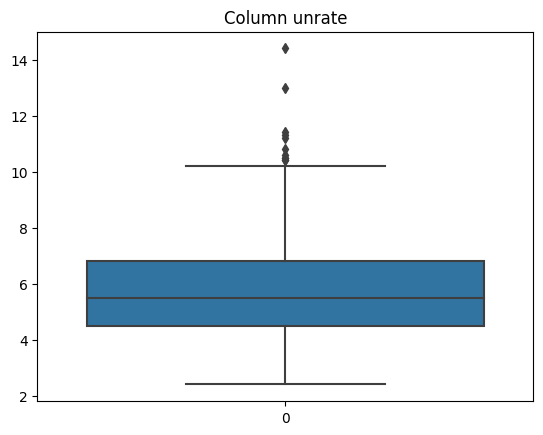

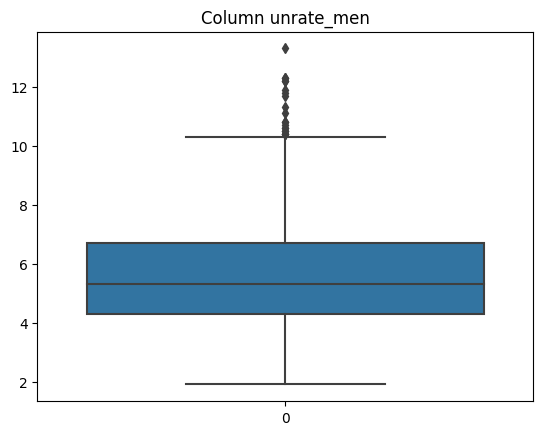

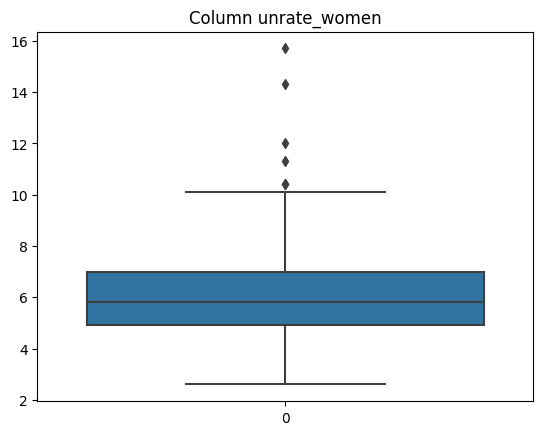

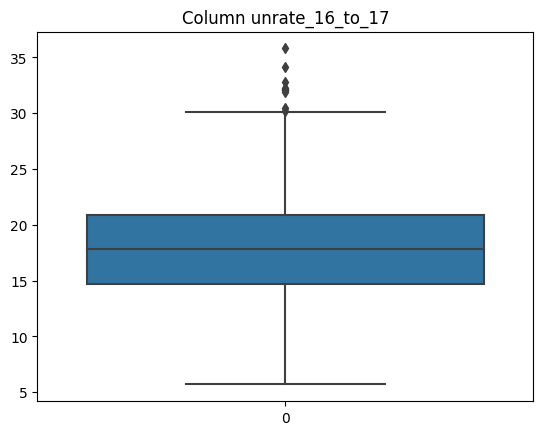

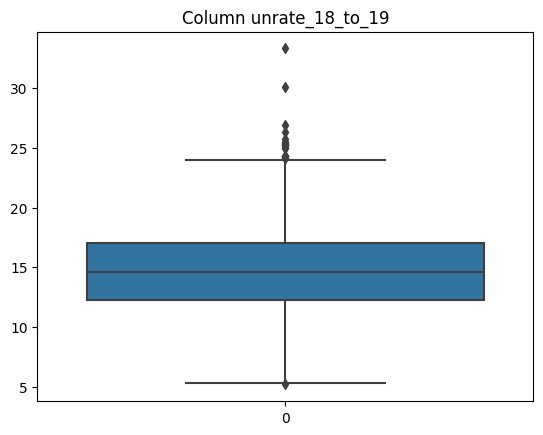

In [ ]:

# Cek Outliers
# Ada error ternyata harus Float sedangkan dataframe masih ada Date jadi di drop dulu
columns = np.delete(df.columns, 0)
for col in columns:
  plt.title(f'Column {col}')
  sns.boxplot(df[col])
  plt.show()

In [25]:
# Next Step adalah Cek Korelasi antaar Column karena Column Date gak ke pake jadi kita drop dulu
new_df = df.drop('date', axis=1)
new_df

unrate  unrate_men  unrate_women  unrate_16_to_17  unrate_18_to_19  \
0       4.0         4.2           3.5             10.8              9.6   
1       4.7         4.7           4.8             15.0              9.5   
2       4.5         4.5           4.4             13.2              9.3   
3       4.0         4.0           4.1              9.9              8.1   
4       3.4         3.3           3.4              6.4              7.2   
..      ...         ...           ...              ...              ...   
882     5.7         5.5           5.8             12.8              9.9   
883     5.3         5.1           5.5             10.7             11.0   
884     4.6         4.6           4.5              9.2             12.6   
885     4.3         4.2           4.4              8.6             12.7   
886     3.9         3.9           3.9              9.7             11.0   

     unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  unrate_45_to_54  \
0                6.6              3.6              2.6              2.7   
1                8.0              4.0              3.2              3.4   
2                8.6              3.5              3.2              2.9   
3                6.8              3.5              3.1              2.9   
4                6.3              2.8              2.5              2.3   
..               ...              ...              ...              ...   
882              9.5              6.3              4.8              4.0   
883              9.1              5.8              4.4              4.2   
884              7.7              5.0              3.8              3.7   
885              6.8              4.5              3.6              3.5   
886              6.6              3.8              3.6              2.8   

     unrate_55_over  
0               3.6  
1               4.0  
2               3.5  
3               3.2  
4               2.9  
..              ...  
882             4.6  
883             4.1  
884             3.3  
885             3.3  
886             3.1  

[887 rows x 10 columns]

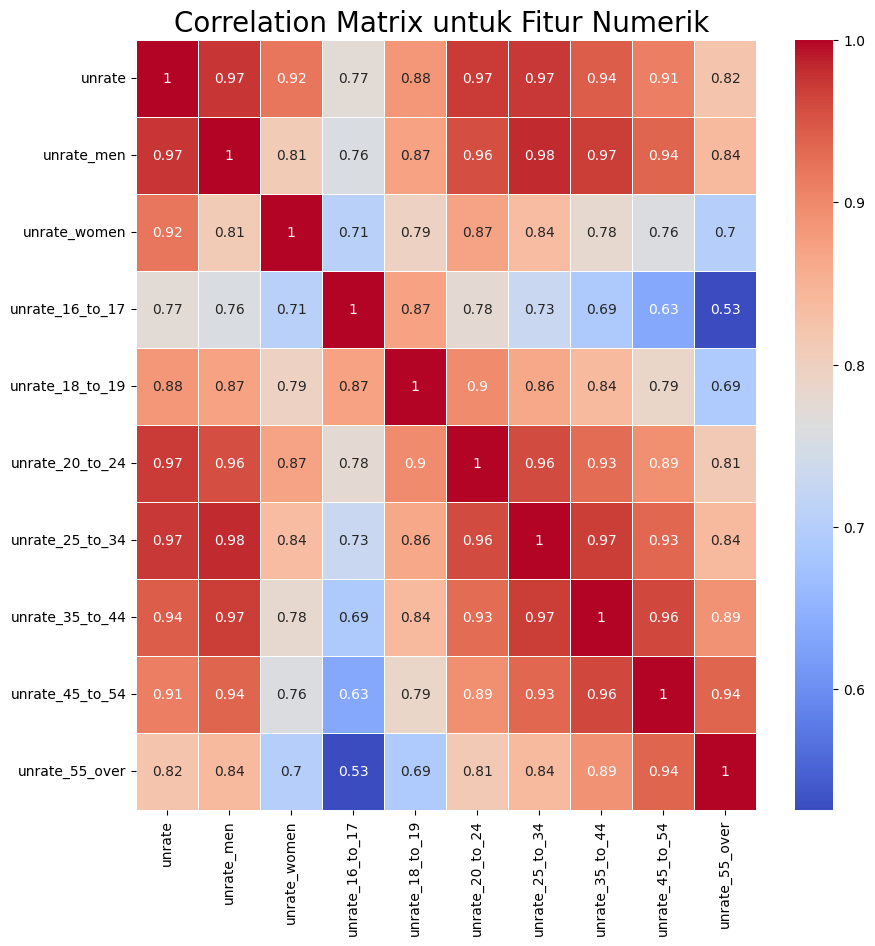

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

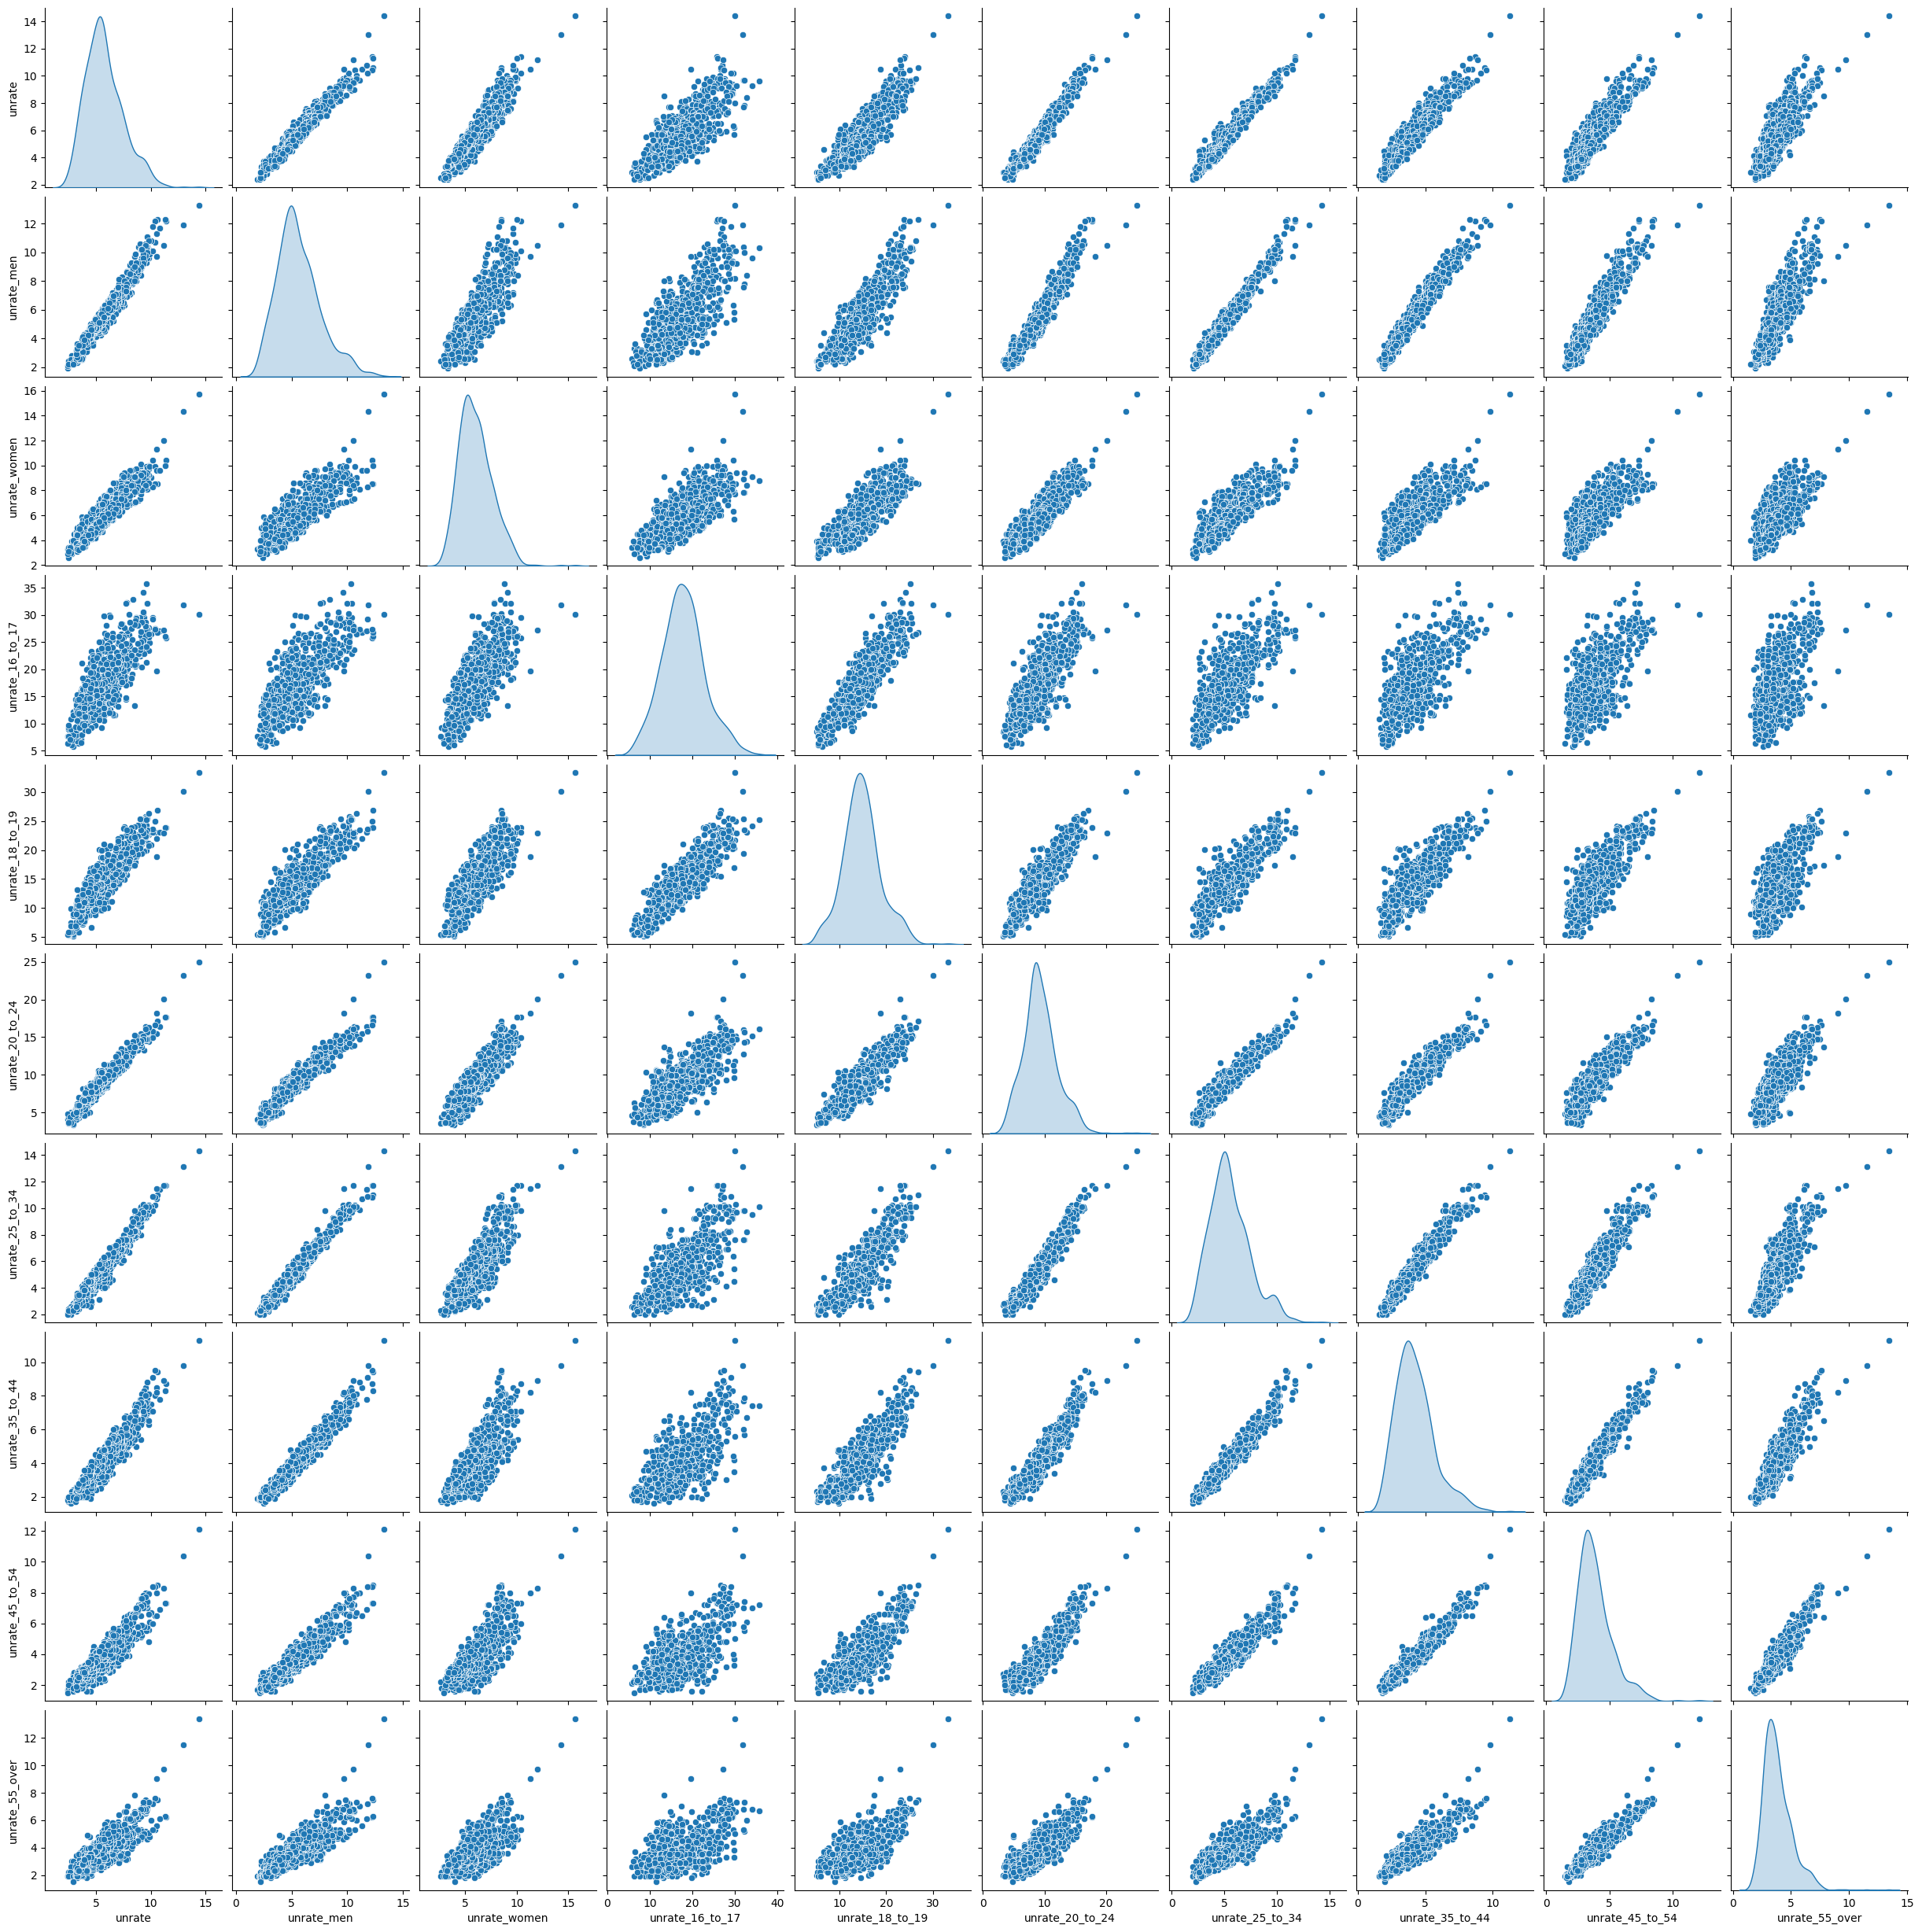

In [27]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(new_df, diag_kind = 'kde')


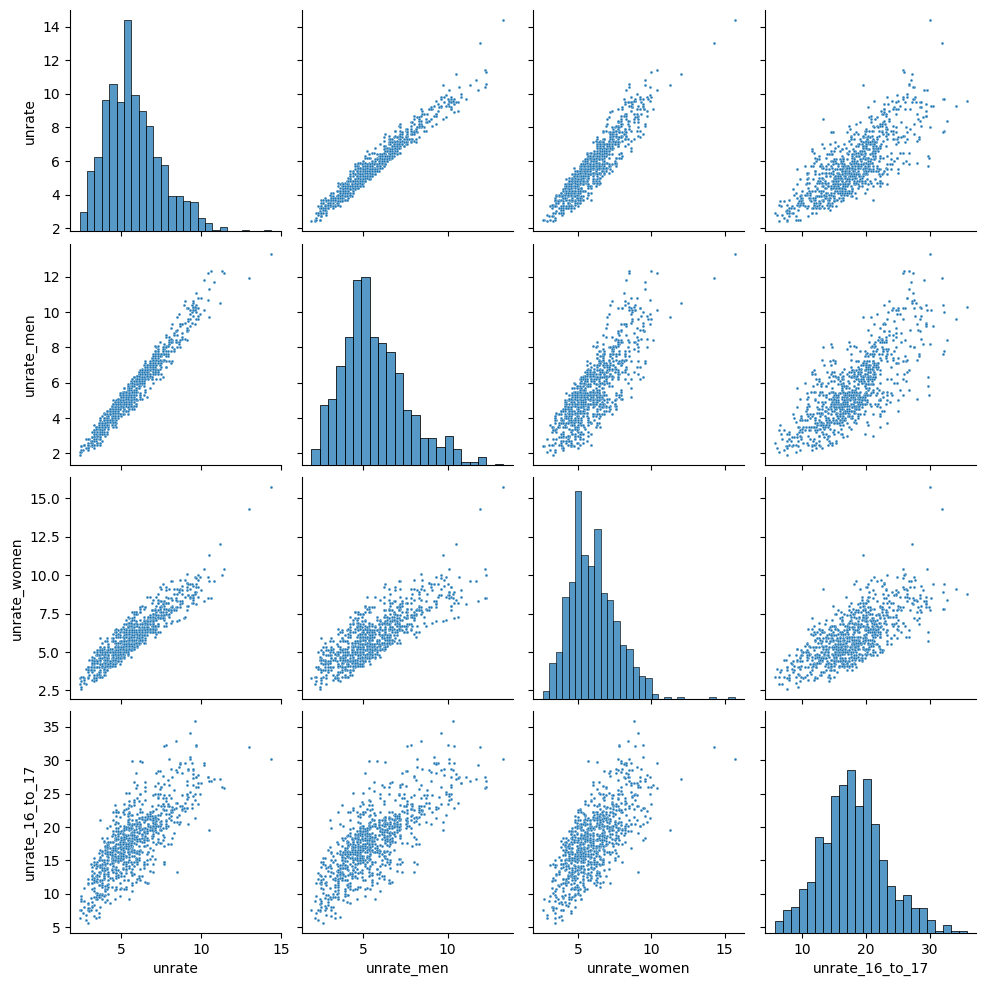

In [28]:
# Terlalu besar agak sulit dilihat
sns.pairplot(df[['unrate','unrate_men','unrate_women', 'unrate_16_to_17']], plot_kws={"s": 4});

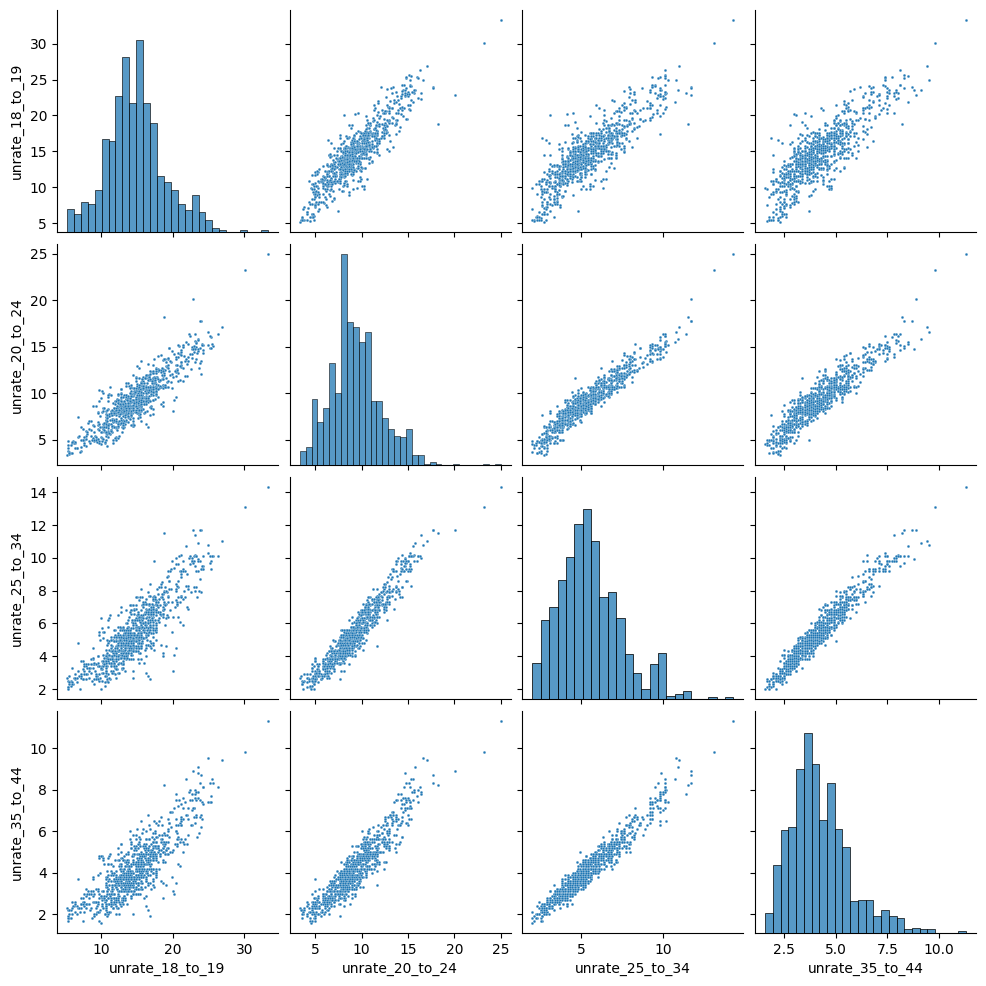

In [29]:
# By Class of unemployment
sns.pairplot(df[['unrate_18_to_19','unrate_20_to_24','unrate_25_to_34', 'unrate_35_to_44']], plot_kws={"s": 4});

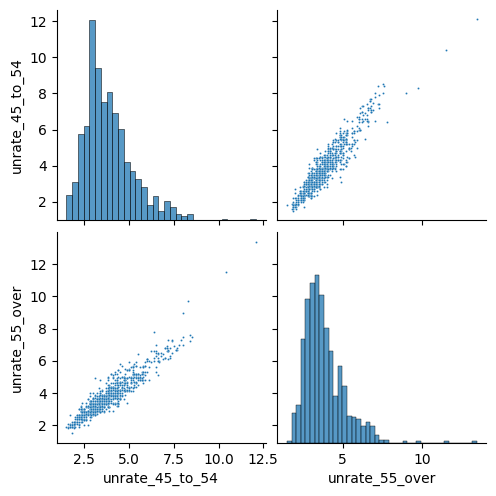

In [30]:

# By Class of unemployment
sns.pairplot(df[['unrate_45_to_54','unrate_55_over']], plot_kws={"s": 2});

#Data Preparation
* Menerapkan dan menyebutkan teknik data preparation yang dilakukan
* Teknik yang digunakan pada notebook dan laporan harus berurutan
* Menjelaskan proses data preparation yang dilakukan
* Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.

In [31]:
from scipy import stats
z = np.abs(stats.zscore(new_df))
print(z)

       unrate  unrate_men  unrate_women  unrate_16_to_17  unrate_18_to_19  \
0    1.013808    0.733904      1.573245         1.424128         1.291483   
1    0.611306    0.477958      0.764458         0.586818         1.316201   
2    0.726307    0.580337      1.013316         0.945665         1.365638   
3    1.013808    0.836283      1.199959         1.603551         1.662257   
4    1.358811    1.194607      1.635460         2.301310         1.884722   
..        ...         ...           ...              ...              ...   
882  0.036302    0.068445      0.142315         1.025409         1.217328   
883  0.266304    0.273202      0.328958         1.444064         0.945426   
884  0.668806    0.529148      0.951102         1.743103         0.549933   
885  0.841307    0.733904      1.013316         1.862719         0.525215   
886  1.071309    0.887472      1.324388         1.643423         0.945426   

     unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  unrate_45_to_54  \


In [32]:
z.shape

(887, 10)

In [33]:
threshold = 3
print(np.where(z > 3))

(array([420, 420, 420, 420, 421, 421, 421, 422, 422, 743, 743, 744, 744,
       744, 745, 745, 745, 745, 746, 746, 746, 749, 751, 761, 867, 867,
       867, 867, 867, 867, 867, 867, 867, 868, 868, 868, 868, 868, 868,
       868, 868, 868, 869, 869, 869, 869, 869, 869, 869, 870, 870, 870,
       870, 870, 871]), array([0, 1, 6, 7, 0, 1, 6, 1, 6, 7, 8, 1, 7, 8, 1, 7, 8, 9, 1, 7, 8, 3,
       8, 3, 0, 1, 2, 4, 5, 6, 7, 8, 9, 0, 1, 2, 4, 5, 6, 7, 8, 9, 0, 2,
       5, 6, 7, 8, 9, 2, 5, 6, 8, 9, 9]))


In [34]:
print(z['unrate'][420])


3.241217940176613


##Removing Outliers

In [35]:
new_df_o = new_df
new_df_o = new_df_o[(z < 3).all(axis=1)]

In [36]:
new_df.shape


(887, 10)

In [37]:
new_df_o.shape

(872, 10)

In [38]:
new_df_o1 = new_df

In [39]:
Q1 = new_df_o1.quantile(0.25)
Q3 = new_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

unrate             2.30
unrate_men         2.40
unrate_women       2.10
unrate_16_to_17    6.20
unrate_18_to_19    4.70
unrate_20_to_24    3.10
unrate_25_to_34    2.50
unrate_35_to_44    1.80
unrate_45_to_54    1.55
unrate_55_over     1.40
dtype: float64


In [40]:
print(new_df_o1 < (Q1 - 1.5 * IQR)) or (new_df_o1 > (Q3 + 1.5 * IQR))

     unrate  unrate_men  unrate_women  unrate_16_to_17  unrate_18_to_19  \
0     False       False         False            False            False   
1     False       False         False            False            False   
2     False       False         False            False            False   
3     False       False         False            False            False   
4     False       False         False            False            False   
..      ...         ...           ...              ...              ...   
882   False       False         False            False            False   
883   False       False         False            False            False   
884   False       False         False            False            False   
885   False       False         False            False            False   
886   False       False         False            False            False   

     unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  unrate_45_to_54  \
0              False    

unrate  unrate_men  unrate_women  unrate_16_to_17  unrate_18_to_19  \
0     False       False         False            False            False   
1     False       False         False            False            False   
2     False       False         False            False            False   
3     False       False         False            False            False   
4     False       False         False            False            False   
..      ...         ...           ...              ...              ...   
882   False       False         False            False            False   
883   False       False         False            False            False   
884   False       False         False            False            False   
885   False       False         False            False            False   
886   False       False         False            False            False   

     unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  unrate_45_to_54  \
0              False            False            False            False   
1              False            False            False            False   
2              False            False            False            False   
3              False            False            False            False   
4              False            False            False            False   
..               ...              ...              ...              ...   
882            False            False            False            False   
883            False            False            False            False   
884            False            False            False            False   
885            False            False            False            False   
886            False            False            False            False   

     unrate_55_over  
0             False  
1             False  
2             False  
3             False  
4             False  
..              ...  
882           False  
883           False  
884           False  
885           False  
886           False  

[887 rows x 10 columns]

In [41]:
new_df_out = new_df_o1[~((new_df_o1 < (Q1 - 1.5 * IQR)) |(new_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [42]:
new_df_out.shape

(834, 10)

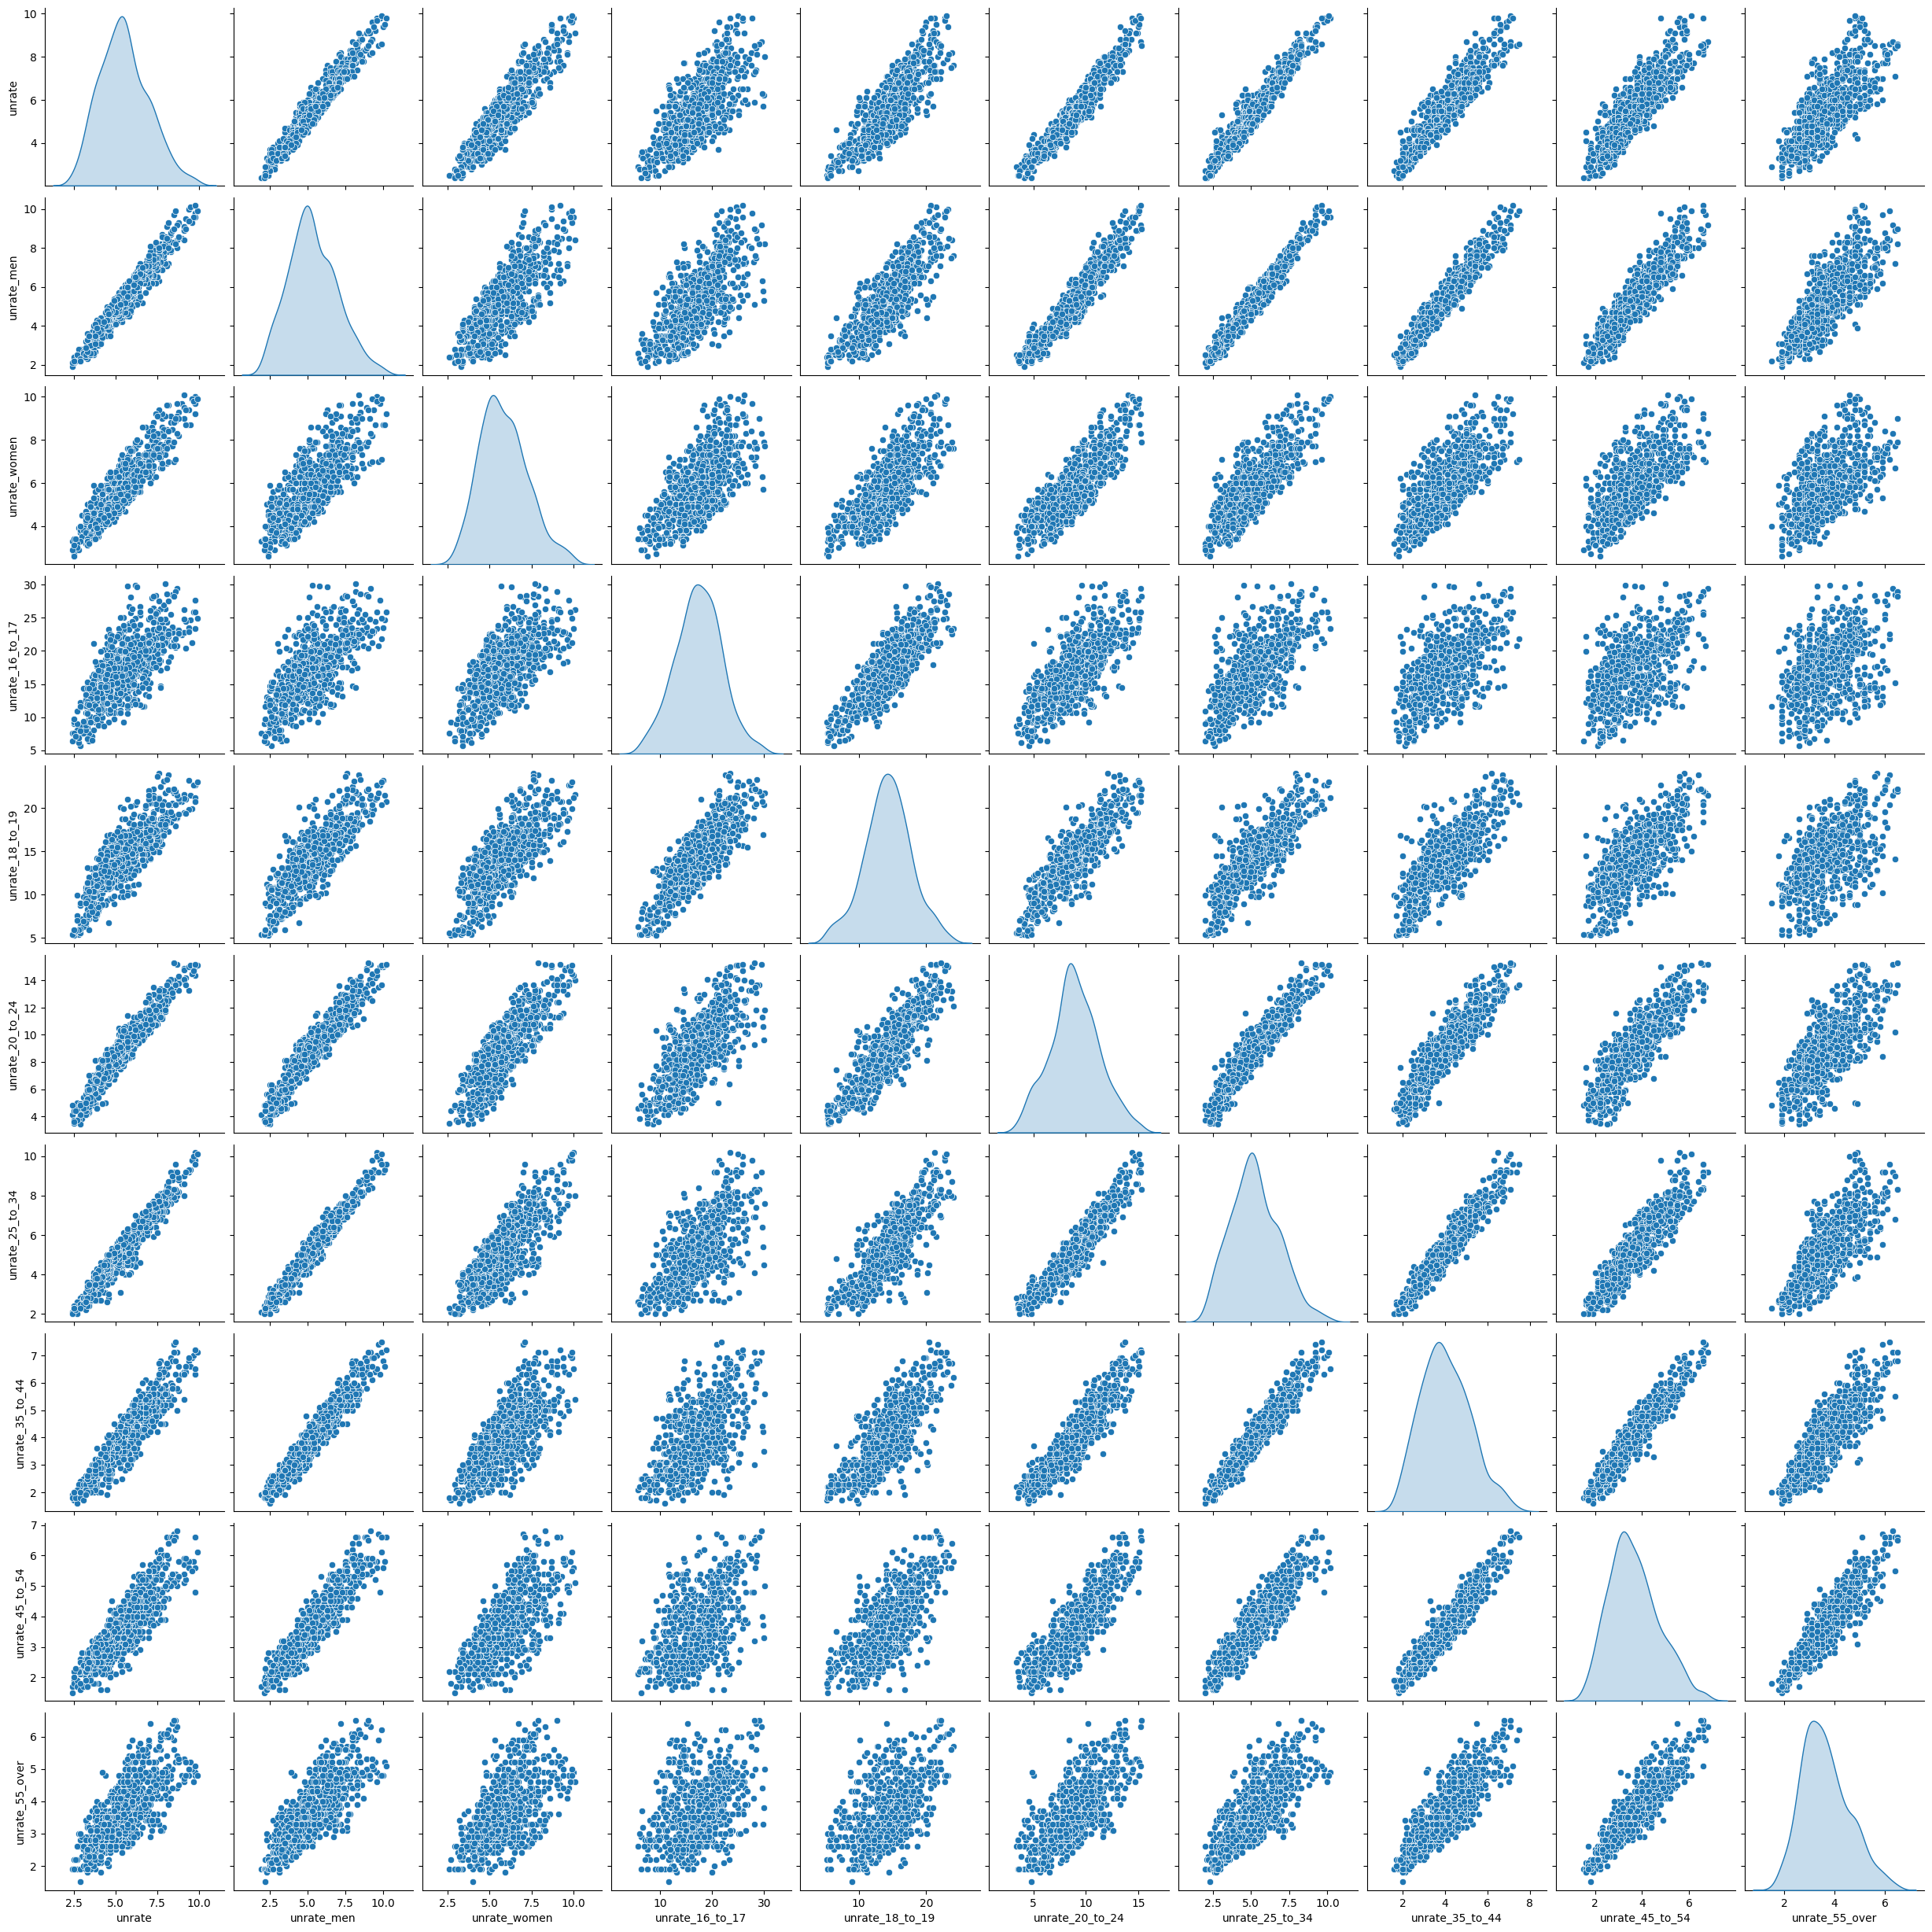

In [43]:
sns.pairplot(new_df_out, diag_kind = 'kde')

In [44]:
new_df_out.head()

unrate  unrate_men  unrate_women  unrate_16_to_17  unrate_18_to_19  \
0     4.0         4.2           3.5             10.8              9.6   
1     4.7         4.7           4.8             15.0              9.5   
2     4.5         4.5           4.4             13.2              9.3   
3     4.0         4.0           4.1              9.9              8.1   
4     3.4         3.3           3.4              6.4              7.2   

   unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  unrate_45_to_54  \
0              6.6              3.6              2.6              2.7   
1              8.0              4.0              3.2              3.4   
2              8.6              3.5              3.2              2.9   
3              6.8              3.5              3.1              2.9   
4              6.3              2.8              2.5              2.3   

   unrate_55_over  
0             3.6  
1             4.0  
2             3.5  
3             3.2  
4             2.9

In [45]:
df.head()

date  unrate  unrate_men  unrate_women  unrate_16_to_17  \
0 1948-01-01     4.0         4.2           3.5             10.8   
1 1948-02-01     4.7         4.7           4.8             15.0   
2 1948-03-01     4.5         4.5           4.4             13.2   
3 1948-04-01     4.0         4.0           4.1              9.9   
4 1948-05-01     3.4         3.3           3.4              6.4   

   unrate_18_to_19  unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  \
0              9.6              6.6              3.6              2.6   
1              9.5              8.0              4.0              3.2   
2              9.3              8.6              3.5              3.2   
3              8.1              6.8              3.5              3.1   
4              7.2              6.3              2.8              2.5   

   unrate_45_to_54  unrate_55_over  
0              2.7             3.6  
1              3.4             4.0  
2              2.9             3.5  
3              2.9             3.2  
4              2.3             2.9

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

final_df = new_df_out
scaler.fit(final_df[final_df.columns])
final_df[final_df.columns] = scaler.transform(final_df.loc[:, final_df.columns])

final_df

<ipython-input-46-41f9ba892295>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[final_df.columns] = scaler.transform(final_df.loc[:, final_df.columns])


unrate  unrate_men  unrate_women  unrate_16_to_17  unrate_18_to_19  \
0    0.213333    0.277108      0.120000         0.209016         0.229947   
1    0.306667    0.337349      0.293333         0.381148         0.224599   
2    0.280000    0.313253      0.240000         0.307377         0.213904   
3    0.213333    0.253012      0.200000         0.172131         0.149733   
4    0.133333    0.168675      0.106667         0.028689         0.101604   
..        ...         ...           ...              ...              ...   
882  0.440000    0.433735      0.426667         0.290984         0.245989   
883  0.386667    0.385542      0.386667         0.204918         0.304813   
884  0.293333    0.325301      0.253333         0.143443         0.390374   
885  0.253333    0.277108      0.240000         0.118852         0.395722   
886  0.200000    0.240964      0.173333         0.163934         0.304813   

     unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  unrate_45_to_54  \
0           0.268908         0.195122         0.169492         0.226415   
1           0.386555         0.243902         0.271186         0.358491   
2           0.436975         0.182927         0.271186         0.264151   
3           0.285714         0.182927         0.254237         0.264151   
4           0.243697         0.097561         0.152542         0.150943   
..               ...              ...              ...              ...   
882         0.512605         0.524390         0.542373         0.471698   
883         0.478992         0.463415         0.474576         0.509434   
884         0.361345         0.365854         0.372881         0.415094   
885         0.285714         0.304878         0.338983         0.377358   
886         0.268908         0.219512         0.338983         0.245283   

     unrate_55_over  
0              0.42  
1              0.50  
2              0.40  
3              0.34  
4              0.28  
..              ...  
882            0.62  
883            0.52  
884            0.36  
885            0.36  
886            0.32  

[834 rows x 10 columns]

In [47]:
final_df.describe()

unrate  unrate_men  unrate_women  unrate_16_to_17  unrate_18_to_19  \
count  834.000000  834.000000    834.000000       834.000000       834.000000   
mean     0.417154    0.416876      0.432966         0.478933         0.482136   
std      0.195737    0.195565      0.189632         0.183277         0.186615   
min      0.000000    0.000000      0.000000         0.000000         0.000000   
25%      0.280000    0.277108      0.293333         0.360656         0.363636   
50%      0.400000    0.397590      0.413333         0.479508         0.481283   
75%      0.546667    0.542169      0.546667         0.602459         0.602941   
max      1.000000    1.000000      1.000000         1.000000         1.000000   

       unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  unrate_45_to_54  \
count       834.000000       834.000000       834.000000       834.000000   
mean          0.468180         0.397672         0.411616         0.406837   
std           0.197096         0.194284         0.196130         0.198209   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.352941         0.256098         0.271186         0.264151   
50%           0.462185         0.378049         0.389831         0.377358   
75%           0.596639         0.524390         0.542373         0.528302   
max           1.000000         1.000000         1.000000         1.000000   

       unrate_55_over  
count      834.000000  
mean         0.430000  
std          0.189076  
min          0.000000  
25%          0.280000  
50%          0.400000  
75%          0.540000  
max          1.000000

In [48]:

# Abis di Standar tinggal di split, jadi data test tinggal tembak aja pake pred
from sklearn.model_selection import train_test_split

X, y = final_df.drop('unrate', axis=1), final_df['unrate']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=767)

#Modelling
* Membuat model machine learning untuk menyelesaikan permasalahan
* Menjelasakan tahapan dan parameter yang digunakan pada proses permodelan
* Menjelaskan kelebihan dan kekurangan dari setiap algoritma yang digunakan
* Jika menggunakan satu algoritma pada solution statement, lakukan proses improvement terhadap model dengan hyperparameter tuning. Jelaskan proses improvement yang dilakukan.
* Jika menggunakan dua atau lebih algoritma pada solution statement, maka pilih model terbaik sebagai solusi. Jelaskan mengapa memilih model tersebut sebagai model terbaik.

<br>

**Penulis akan menggunakan lazy predict untuk membantu mencapai hasil yang terbaik dalam membuat model machine learning**

link dokumentasi lazy predict di https://lazypredict.readthedocs.io/en/latest/usage.html#regression


In [49]:
!pip install lazypredict

In [50]:
from lazypredict.Supervised import LazyRegressor

# Declare the Function
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )

In [51]:
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

 26%|██▌       | 11/42 [00:01<00:03,  9.72it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████| 42/42 [00:13<00:00,  3.08it/s]


In [52]:
models

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LassoCV                                      1.00       1.00  0.01        0.07
NuSVR                                        1.00       1.00  0.01        0.26
ElasticNetCV                                 1.00       1.00  0.01        0.16
LassoLarsCV                                  1.00       1.00  0.01        0.03
LassoLarsIC                                  1.00       1.00  0.01        0.03
LinearRegression                             1.00       1.00  0.01        0.01
TransformedTargetRegressor                   1.00       1.00  0.01        0.02
RANSACRegressor                              1.00       1.00  0.01        0.07
BayesianRidge                                1.00       1.00  0.01        0.05
RidgeCV                                      1.00       1.00  0.01        0.02
OrthogonalMatchingPursuitCV                  1.00       1.00  0.01        0.04
HuberRegressor                               1.00       1.00  0.01        0.04
Ridge                                        1.00       1.00  0.01        0.02
LarsCV                                       1.00       1.00  0.01        0.07
LinearSVR                                    1.00       1.00  0.01        0.05
Lars                                         1.00       1.00  0.01        0.05
HistGradientBoostingRegressor                1.00       1.00  0.01        0.32
LGBMRegressor                                1.00       1.00  0.01        0.33
ExtraTreesRegressor                          1.00       1.00  0.01        0.25
GradientBoostingRegressor                    1.00       1.00  0.01        0.25
RandomForestRegressor                        0.99       1.00  0.01        0.64
XGBRegressor                                 0.99       1.00  0.01        0.25
BaggingRegressor                             0.99       0.99  0.01        0.20
SGDRegressor                                 0.99       0.99  0.02        0.02
KNeighborsRegressor                          0.99       0.99  0.02        0.01
DecisionTreeRegressor                        0.98       0.98  0.02        0.05
AdaBoostRegressor                            0.98       0.98  0.03        0.66
ExtraTreeRegressor                           0.96       0.96  0.03        0.02
PassiveAggressiveRegressor                   0.96       0.96  0.04        0.01
TweedieRegressor                             0.96       0.96  0.04        0.09
GaussianProcessRegressor                     0.95       0.95  0.04        0.09
MLPRegressor                                 0.93       0.93  0.05        0.19
OrthogonalMatchingPursuit                    0.92       0.93  0.05        0.01
SVR                                          0.91       0.92  0.05        0.02
PoissonRegressor                             0.87       0.88  0.06        0.02
QuantileRegressor                           -0.06      -0.01  0.18        9.00
DummyRegressor                              -0.07      -0.01  0.18        0.03
ElasticNet                                  -0.07      -0.01  0.18        0.03
LassoLars                                   -0.07      -0.01  0.18        0.01
Lasso                                       -0.07      -0.01  0.18        0.02
KernelRidge                                 -4.66      -4.35  0.42        0.05

In [62]:

# Training 4 Model Teratas

from sklearn.linear_model import Lasso
from sklearn.svm import NuSVR
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV

from sklearn.metrics import mean_squared_error, r2_score

In [64]:

# Siapkan dataframe untuk analisis model
report = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LassoCV', 'NuSVR', 'ElasticNetCV', 'LassoLarsCV'])

In [63]:

# buat model prediksi
# n_estimator = number of tree in the forest
# max_depth = max kedalaman tree, ini hapus aja biar unlimited
# n_jobs = -1 using all processor
lassoCV = Lasso()
lassoCV.fit(x_train, y_train)

Lasso()

In [65]:
nsvr = NuSVR()
nsvr.fit(x_train, y_train)

NuSVR()

In [66]:
elasticCV=ElasticNetCV()
elasticCV.fit(x_train, y_train)


ElasticNetCV()

In [67]:
lassoLarsCV = LassoLarsCV()
lassoLarsCV.fit(x_train, y_train)

LassoLarsCV()

#Evaluation

In [68]:
final_report = {'Model_Name': [], 'mse': [], 'r2': []}
pred = lassoCV .predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('LassoCV')
final_report['mse'].append(mse)
final_report['r2'].append(r2)
pred = nsvr.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('NuSVR')
final_report['mse'].append(mse)
final_report['r2'].append(r2)
pred = elasticCV.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('ElasticNetCV')
final_report['mse'].append(mse)
final_report['r2'].append(r2)
pred = lassoLarsCV.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('LassoLarsCV')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

In [69]:
final_report

{'Model_Name': ['LassoCV', 'NuSVR', 'ElasticNetCV', 'LassoLarsCV'],
 'mse': [0.03361118352027066,
  5.584341223514932e-05,
  5.83802975620606e-05,
  5.832448681004554e-05],
 'r2': [-0.014810634723853244,
  0.9983139395082199,
  0.9982373442223897,
  0.998239029296783]}

In [70]:
pd.options.display.float_format = '{:.7f}'.format

In [71]:

final_report = pd.DataFrame.from_dict(final_report)
final_report

Model_Name       mse         r2
0       LassoCV 0.0336112 -0.0148106
1         NuSVR 0.0000558  0.9983139
2  ElasticNetCV 0.0000584  0.9982373
3   LassoLarsCV 0.0000583  0.9982390

In [72]:
final_report['rmse'] = np.sqrt(final_report['mse'])

In [73]:
final_report

Model_Name       mse         r2      rmse
0       LassoCV 0.0336112 -0.0148106 0.1833335
1         NuSVR 0.0000558  0.9983139 0.0074728
2  ElasticNetCV 0.0000584  0.9982373 0.0076407
3   LassoLarsCV 0.0000583  0.9982390 0.0076370

In [76]:
# GB sama RF sama mse, rmse, r2 nya
model_dict = {'LassoCV': lassoCV, 'NuSVR': nsvr, 'ElasticNetCV': elasticCV, 'LassoLarsCV': lassoLarsCV}
prediksi = x_test.iloc[:120].copy()
pred_dict = {'y_true':y_test[:120]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

y_true  prediksi_LassoCV  prediksi_NuSVR  prediksi_ElasticNetCV  \
434 0.7600000         0.4000000       0.8000000              0.8000000   
563 0.3600000         0.4000000       0.4000000              0.4000000   
549 0.5333333         0.4000000       0.5000000              0.5000000   
671 0.4000000         0.4000000       0.4000000              0.4000000   
330 0.8400000         0.4000000       0.8000000              0.8000000   
..        ...               ...             ...                    ...   
313 0.4533333         0.4000000       0.5000000              0.4000000   
834 0.2933333         0.4000000       0.3000000              0.3000000   
879 0.4400000         0.4000000       0.5000000              0.4000000   
195 0.3866667         0.4000000       0.4000000              0.4000000   
52  0.0666667         0.4000000       0.1000000              0.1000000   

     prediksi_LassoLarsCV  
434             0.8000000  
563             0.4000000  
549             0.5000000  
671             0.4000000  
330             0.8000000  
..                    ...  
313             0.5000000  
834             0.3000000  
879             0.4000000  
195             0.4000000  
52              0.1000000  

[120 rows x 5 columns]